# Predicting Greyhound Finishers Using Machine Learning
The purpose of this project is to use Machine Learning to predict greyhound finishers using a machine learning-based approach. We are working with the Kaggle dataset available here: https://www.kaggle.com/datasets/davidregan/greyhound-racing-uk-predict-finish-position?resource=download.

![alt text](greyhound-stock-image.jpg)

## Understanding the Dataset
### Description
This dataset consists of race odds, race information and prior race performance statistics for six greyhounds in each of 2,000 greyhound races run at Crayford in the United Kingdom. All races were run at the standard 380 metres distance.

2,000 races, each with six runners comprises 12,000 data-points in total.

Each data-point/greyhound has 27 predictor variables, plus two potential target variables 'finished' for finish position, first to sixth, and 'Winner', for race win-lose. These are explained below.

The data was constructed from the Racing Post Greyhound Portal and a Betfair API. Many of the predictor variables such as 'Wins_380' were constructed by aggregating prior performance data for each greyhound.

Some features are highly correlated such as the different odds/betting data - 'BSP' (Betfair Starting Price) and 'Odds' (The starting price quoted in The Racing Post).

27 features were considered as predictors of race finish position. A description of each feature is provided below. Features are divided into relevant groups.

#### Race identifier
'Race_ID' --- Unique identifier for each race. Use in machine learning questionable.
#### Odds related
'Odds'--- Bookmaker odds found in the racing post.
'BSP'--- Betfair odds, normally higher than the bookmaker odds.
'Public_Estimate'--- 1 to 6 reflecting the expected finish position based on BSP.
#### All previous races run by the greyhound
'Races_All'--- Total number of races run by the greyhound prior to the race in question.
'Distance_All'--- Average distance for all races run by a greyhound.
'Finish_All'--- Average finish position for all races run by a greyhound. Normalised to 6 runner races.
'Distance_Places_All'---The average distance of races were the greyhound finished 1st or 2nd. This statistic should indicate a
distance preference for each greyhound. For example, if a greyhound has a statistic of 474.0 metres, he
appears to perform well at longer distances than the 380.0 metres of the race to be tested.
'Wide'--- Percentage of races in which the greyhound ran wide, thereby hampering their win chances. Wide runs are not very common.
#### Recent races (seven most recent)
'Distance_Recent'--- Average distance run in seven most recent races.
'Finish_Recent'--- Average finish position in seven most recent races. Statistic corrected for trial races.
'Odds_Recent'--- Average bookmaker odds seven most recent races.
'Early_Recent'--- Average early position in seven most recent races. The recorded position of the greyhound roughly 20
percent of the way into a race.
#### Crayford 380 metre races only
'Races_380'--- Total races of this type in form. This is the race type it is now racing in and for which we want to predict
an expected finish position.

'Wins_380'--- Win percentage for all races at Crayford 380 metres.

'Finish_380'--- Average finish position in seven most recent races at Crayford 380 metres. Corrected for trial races.

'Odds_380'--- Average bookmaker odds in the seven most recent races at Crayford 380 metres.

'Early_380'--- Average relative early position in seven most recent Crayford 380m races.

'Grade_380'--- Average race grade in the seven most recent races at Crayford 380 metres.

'Stay_380'--- Average finish position minus early position for seven most recent Crayford 380m races. A measure of
the greyhound’s stamina at the distance. For example, a statistic of -2.5 indicates that a greyhound starts
relatively well but then fails back towards the end.

'Time_380'--- Average race completion time for races at Crayford 380 metres. Seven most recent.

'Early_Time_380'--- Average time to first bend (20 percent into the race) for races at Crayford 380 metres. Seven most
recent.

'Wide_380'--- Average number of wide ‘W’ remarks in races at Crayford 380 metres. Seven most recent.

'Dist_By'--- Average distance in metres that a greyhound finished to the race winner. Calculated from seven most
recent Crayford 380m races.

#### Other features
'Trap'--- Trap number from 1 to 6 for each greyhound’s starting trap/stall.
'Last_Run'--- Number of days since the greyhound’s last race.
'Favourite'--- Trap number of the greyhound who is race favourite i.e. the one with the lowest BSP.
#### Target variable
'Finished'--- 1 to 6 for first to sixth finishing places.
or
'Winner'--- 1 or 0, for binary win race or not.

## Solution Approach
Predicting the target variable entails a typical classification problem. We will try the following tree-based models for this purpose, in order.
1. Logistic regression (predicting winner or not)
2. Decision tree (both for predicting "finished" and "winner".)
3. Boosted tree (both for predicting "finished" and "winner".)
4. Bagged tree (both for predicting "finished" and "winner".)
5. Random forest (both for predicting "finished" and "winner".)
6. AdaBoost (both for predicting "finished" and "winner".)
7. XGBoost (both for predicting "finished" and "winner".)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('data/data_final.csv')

# Display basic information
print(f"Dataset shape: {data.shape}")
print("\nFirst few rows:")
print(data.head())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Basic statistics
print("\nBasic statistics:")
print(data.describe())

Dataset shape: (12006, 28)

First few rows:
   Race_ID  Trap  Odds  BSP  ...  Finished  Wide_380  Dist_By  Winner
0        0     6  2.75  4.0  ...         4      0.00   -10.50       0
1        0     3  5.00  7.6  ...         1      0.14    -4.71       1
2        0     5  5.00  9.4  ...         3      0.00    -2.86       0
3        0     4  7.00  7.8  ...         2      0.00    -2.71       0
4        0     2  5.00  5.1  ...         6      0.00    -2.32       0

[5 rows x 28 columns]

Missing values:
Race_ID                0
Trap                   0
Odds                   0
BSP                    0
Public_Estimate        0
Last_Run               0
Distance_All           0
Finish_All             0
Distance_Places_All    0
Races_All              0
Distance_Recent        0
Finish_Recent          0
Odds_Recent            0
Early_Recent           0
Races_380              0
Wins_380               0
Finish_380             0
Odds_380               0
Early_380              0
Grade_380            


Correlation with 'Finished':
Finished               1.000000
Public_Estimate        0.224945
BSP                    0.223872
Odds                   0.207712
Finish_All             0.069775
Odds_380               0.062572
Odds_Recent            0.061825
Finish_380             0.053288
Finish_Recent          0.049435
Stay_380               0.045434
Last_Run               0.033326
Distance_Recent        0.031767
Early_Time_380         0.024740
Distance_All           0.018103
Trap                   0.016462
Distance_Places_All    0.015190
Wins_380               0.009016
Grade_380              0.008554
Races_All              0.007353
Races_380              0.005180
Race_ID                0.000089
Favourite             -0.000121
Wide_380              -0.001056
Time_380              -0.001633
Early_Recent          -0.003061
Early_380             -0.009208
Dist_By               -0.043816
Winner                -0.654467
Name: Finished, dtype: float64

Correlation with 'Winner':
Winner         

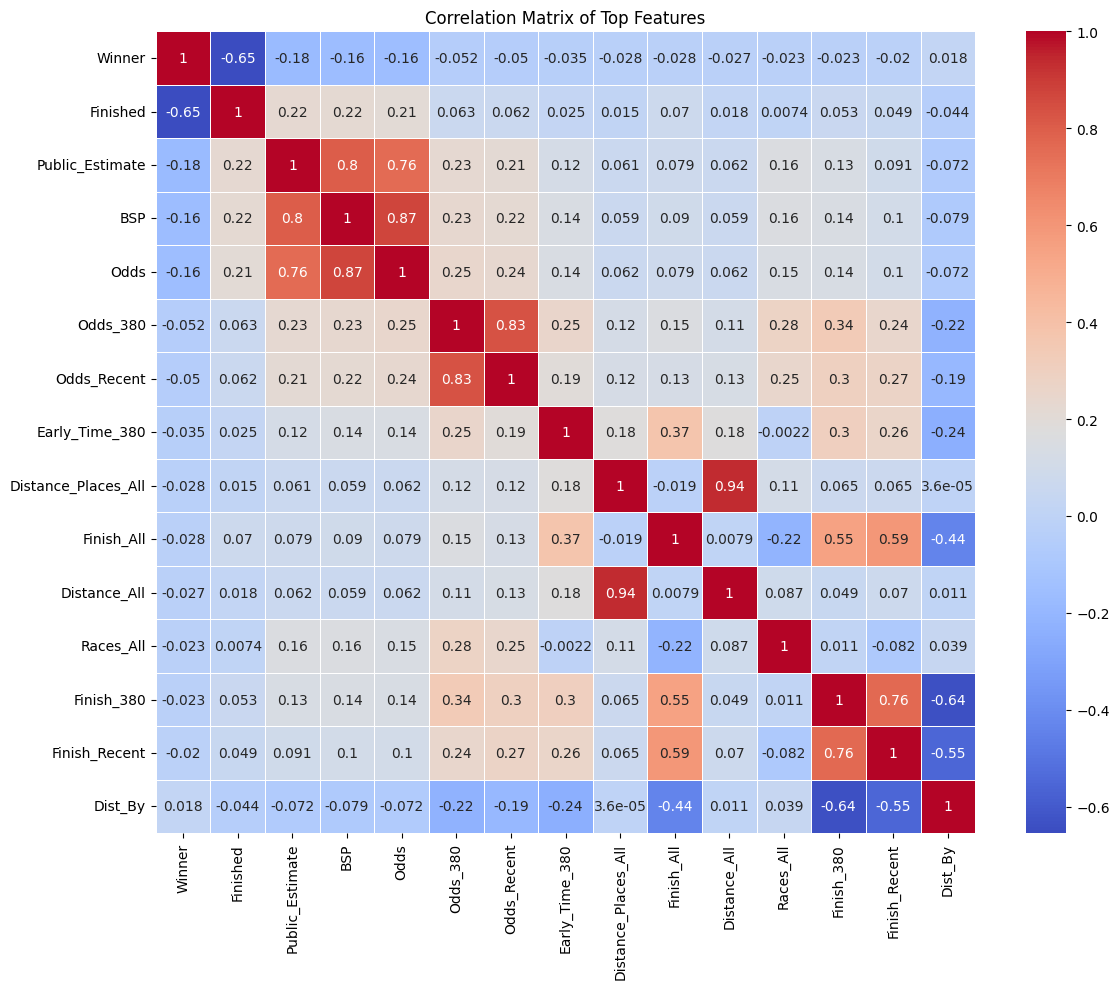

In [3]:
# Feature correlation with target variables
print("\nCorrelation with 'Finished':")
corr_finished = data.corr()['Finished'].sort_values(ascending=False)
print(corr_finished)

print("\nCorrelation with 'Winner':")
corr_winner = data.corr()['Winner'].sort_values(ascending=False)
print(corr_winner)

# Visualize correlation matrix (for top features)
plt.figure(figsize=(12, 10))
top_features = corr_winner.abs().sort_values(ascending=False).head(15).index
sns.heatmap(data[top_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Top Features')
plt.tight_layout()
plt.show()

In [4]:
# Data Preprocessing
# Separate features and target variables
X = data.drop(['Finished', 'Winner'], axis=1)
y_finished = data['Finished']
y_winner = data['Winner']

# (Race_ID is likely not useful for prediction)
X = X.drop(['Race_ID'], axis=1)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_finished_train, y_finished_test = train_test_split(X, y_finished, test_size=0.2, random_state=42)
_, _, y_winner_train, y_winner_test = train_test_split(X, y_winner, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to pandas DataFrame for better readability
feature_names = X.columns
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Feature names: {feature_names.tolist()}")

Training set shape: (9604, 25)
Test set shape: (2402, 25)
Feature names: ['Trap', 'Odds', 'BSP', 'Public_Estimate', 'Last_Run', 'Distance_All', 'Finish_All', 'Distance_Places_All', 'Races_All', 'Distance_Recent', 'Finish_Recent', 'Odds_Recent', 'Early_Recent', 'Races_380', 'Wins_380', 'Finish_380', 'Odds_380', 'Early_380', 'Grade_380', 'Time_380', 'Early_Time_380', 'Stay_380', 'Favourite', 'Wide_380', 'Dist_By']


Logistic Regression Accuracy: 0.8343

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2004
           1       0.00      0.00      0.00       398

    accuracy                           0.83      2402
   macro avg       0.42      0.50      0.45      2402
weighted avg       0.70      0.83      0.76      2402


Feature Importance (Top 10):
            Feature  Coefficient
17        Early_380     0.102630
18        Grade_380     0.065621
15       Finish_380     0.058747
16         Odds_380     0.038265
4          Last_Run     0.037828
5      Distance_All     0.032093
13        Races_380     0.030847
10    Finish_Recent     0.024030
9   Distance_Recent     0.019238
22        Favourite     0.016828


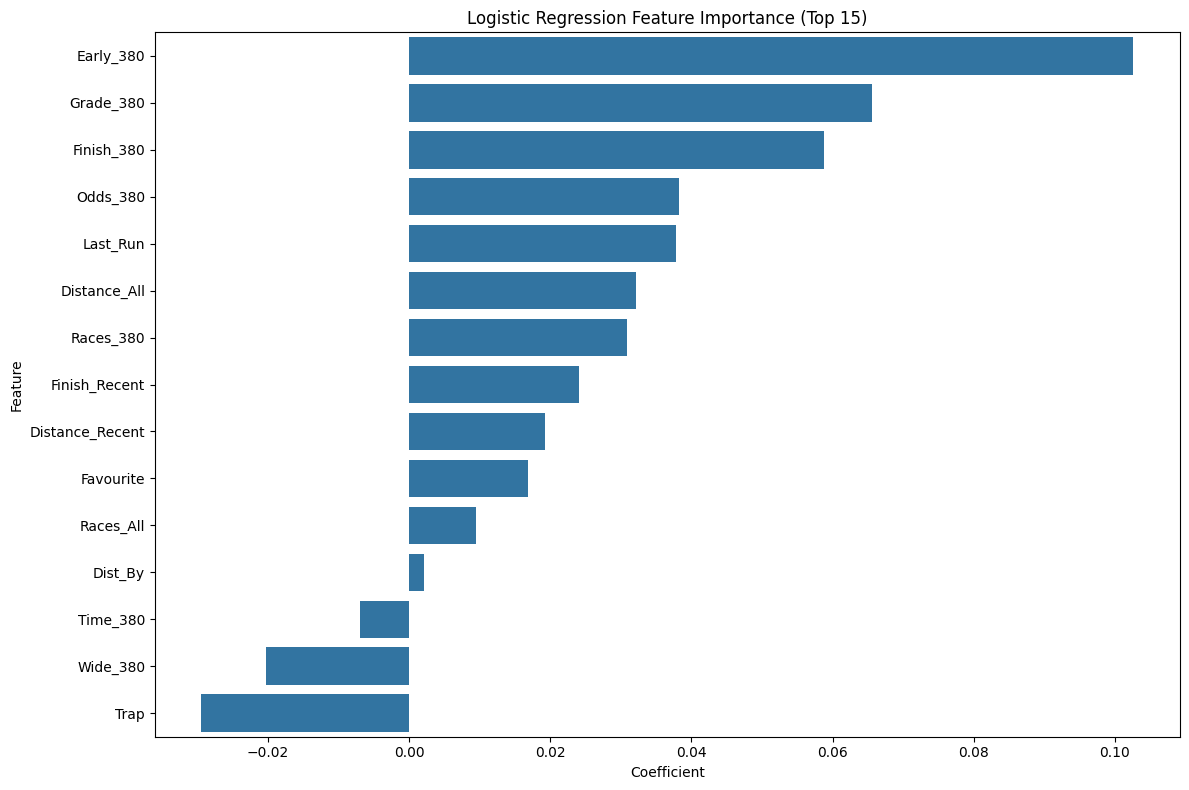

In [5]:
# Logistic Regression for binary classification (Winner prediction)
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_winner_train)

# Make predictions
y_winner_pred = log_reg.predict(X_test_scaled)
y_winner_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_winner_test, y_winner_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_winner_test, y_winner_pred))

# Feature importance
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': log_reg.coef_[0]
})
coef_df = coef_df.sort_values('Coefficient', ascending=False)
print("\nFeature Importance (Top 10):")
print(coef_df.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=coef_df.head(15), x='Coefficient', y='Feature')
plt.title('Logistic Regression Feature Importance (Top 15)')
plt.tight_layout()
plt.show()

Decision Tree Accuracy for Finished Position: 0.1823

Classification Report:
              precision    recall  f1-score   support

           1       0.21      0.20      0.20       398
           2       0.15      0.17      0.16       357
           3       0.16      0.18      0.17       395
           4       0.17      0.16      0.17       413
           5       0.18      0.16      0.17       410
           6       0.22      0.21      0.22       429

    accuracy                           0.18      2402
   macro avg       0.18      0.18      0.18      2402
weighted avg       0.18      0.18      0.18      2402


Feature Importance (Top 10):
          Feature  Importance
2             BSP    0.068428
6      Finish_All    0.059234
24        Dist_By    0.057379
11    Odds_Recent    0.054135
18      Grade_380    0.053154
19       Time_380    0.049094
10  Finish_Recent    0.048844
16       Odds_380    0.047793
8       Races_All    0.047674
21       Stay_380    0.045211


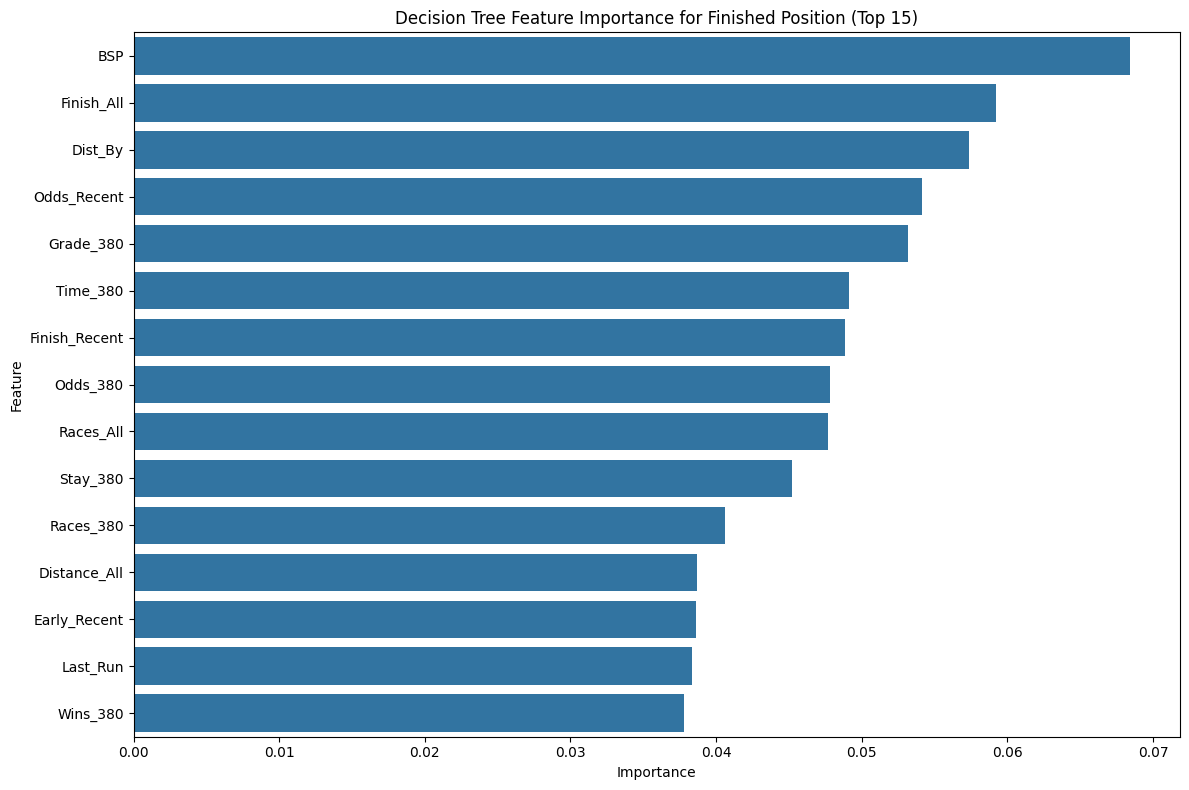

In [6]:
# Decision Tree for multiclass classification (Finished position prediction)
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_finished = DecisionTreeClassifier(random_state=42)

# Train the model
dt_finished.fit(X_train_scaled, y_finished_train)

# Make predictions
y_finished_pred = dt_finished.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_finished_test, y_finished_pred)
print(f"Decision Tree Accuracy for Finished Position: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_finished_test, y_finished_pred))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_finished.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature')
plt.title('Decision Tree Feature Importance for Finished Position (Top 15)')
plt.tight_layout()
plt.show()

Decision Tree Accuracy for Winner Prediction: 0.7348

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2004
           1       0.24      0.27      0.25       398

    accuracy                           0.73      2402
   macro avg       0.54      0.55      0.55      2402
weighted avg       0.75      0.73      0.74      2402


Feature Importance (Top 10):
          Feature  Importance
2             BSP    0.090247
16       Odds_380    0.060968
8       Races_All    0.060545
10  Finish_Recent    0.055783
24        Dist_By    0.055436
12   Early_Recent    0.054216
19       Time_380    0.052532
6      Finish_All    0.052332
5    Distance_All    0.051860
21       Stay_380    0.050030


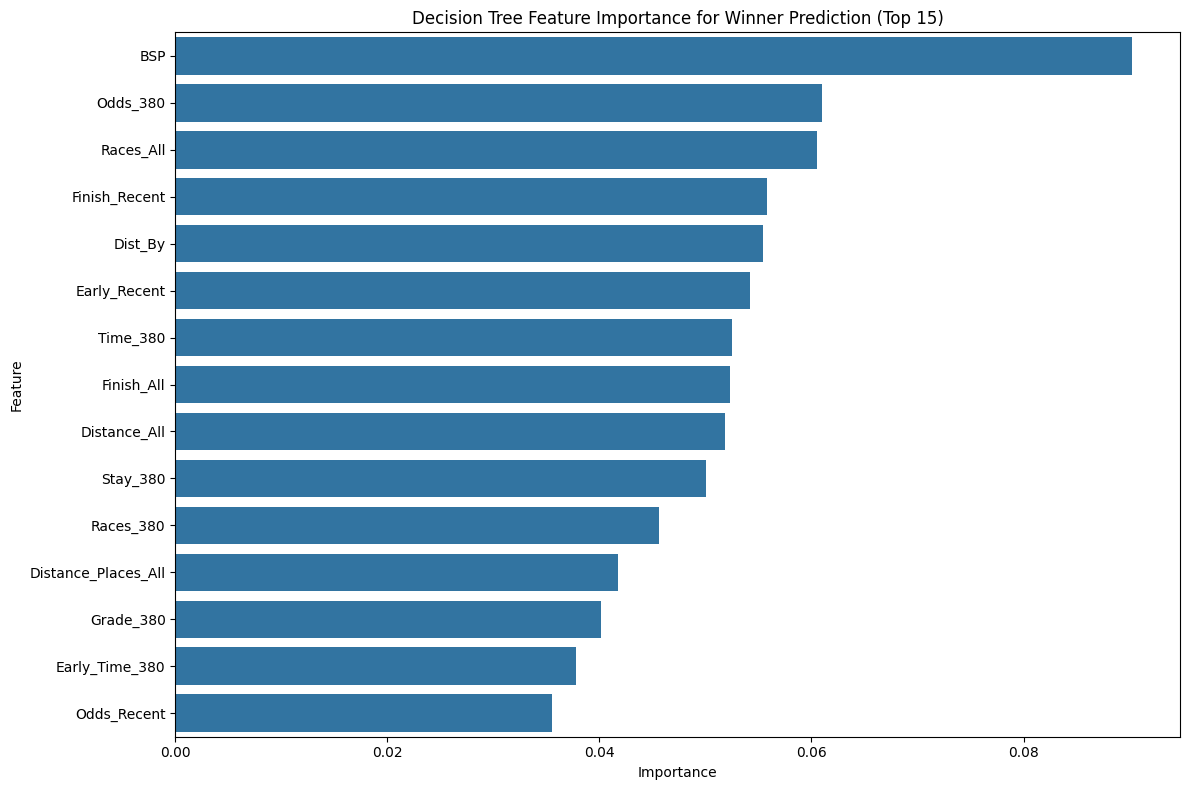

In [7]:
# Decision Tree for binary classification (Winner prediction)
dt_winner = DecisionTreeClassifier(random_state=42)

# Train the model
dt_winner.fit(X_train_scaled, y_winner_train)

# Make predictions
y_winner_pred_dt = dt_winner.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_winner_test, y_winner_pred_dt)
print(f"Decision Tree Accuracy for Winner Prediction: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_winner_test, y_winner_pred_dt))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_winner.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature')
plt.title('Decision Tree Feature Importance for Winner Prediction (Top 15)')
plt.tight_layout()
plt.show()

Random Forest Accuracy for Finished Position: 0.2077

Classification Report:
              precision    recall  f1-score   support

           1       0.23      0.29      0.25       398
           2       0.18      0.20      0.19       357
           3       0.17      0.15      0.16       395
           4       0.21      0.18      0.19       413
           5       0.20      0.17      0.18       410
           6       0.25      0.25      0.25       429

    accuracy                           0.21      2402
   macro avg       0.21      0.21      0.21      2402
weighted avg       0.21      0.21      0.21      2402


Feature Importance (Top 10):
         Feature  Importance
2            BSP    0.061653
6     Finish_All    0.052420
24       Dist_By    0.051406
19      Time_380    0.050523
11   Odds_Recent    0.050034
8      Races_All    0.048774
16      Odds_380    0.048487
5   Distance_All    0.046734
13     Races_380    0.046202
12  Early_Recent    0.045625


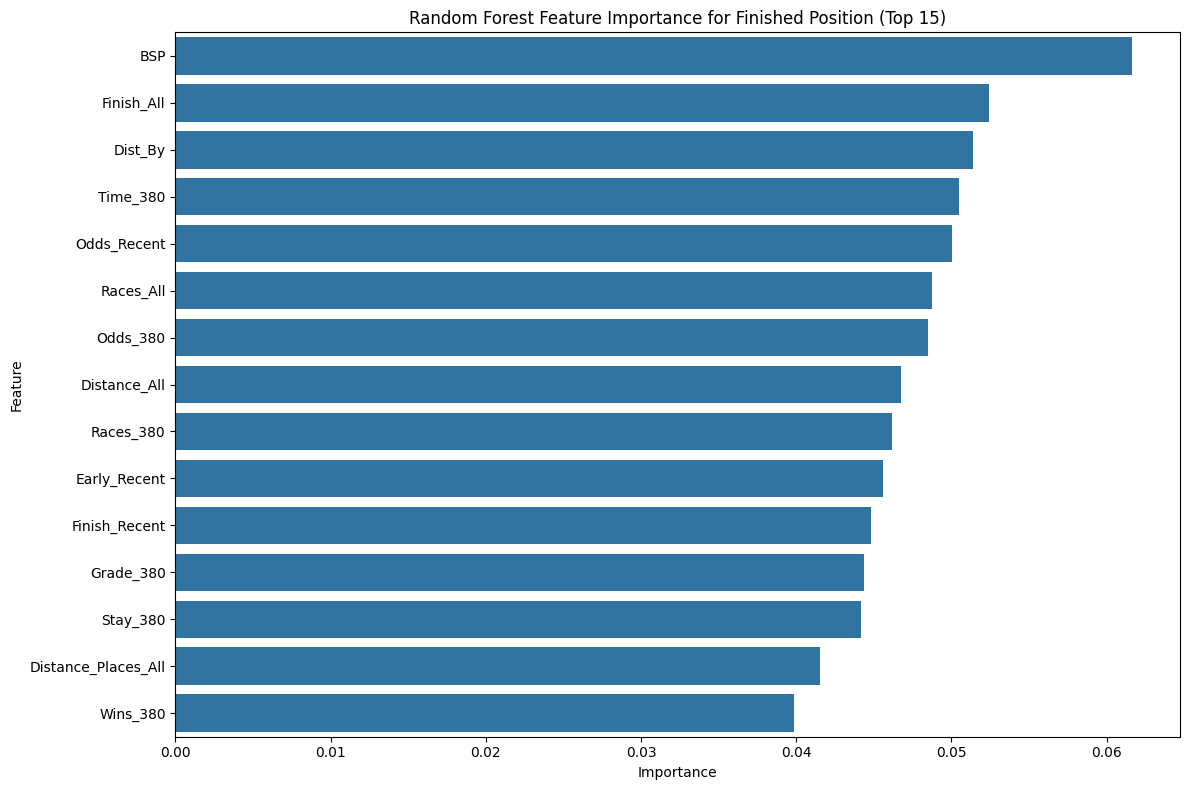

In [8]:
# Random Forest for multiclass classification (Finished position prediction)
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_finished = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_finished.fit(X_train_scaled, y_finished_train)

# Make predictions
y_finished_pred_rf = rf_finished.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_finished_test, y_finished_pred_rf)
print(f"Random Forest Accuracy for Finished Position: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_finished_test, y_finished_pred_rf))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_finished.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature')
plt.title('Random Forest Feature Importance for Finished Position (Top 15)')
plt.tight_layout()
plt.show()

Random Forest Accuracy for Winner Prediction: 0.8322

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2004
           1       0.37      0.02      0.03       398

    accuracy                           0.83      2402
   macro avg       0.60      0.51      0.47      2402
weighted avg       0.76      0.83      0.76      2402


Feature Importance (Top 10):
         Feature  Importance
2            BSP    0.074735
11   Odds_Recent    0.051530
6     Finish_All    0.050934
19      Time_380    0.050292
8      Races_All    0.050141
24       Dist_By    0.049850
16      Odds_380    0.048662
5   Distance_All    0.046110
12  Early_Recent    0.045897
13     Races_380    0.045343


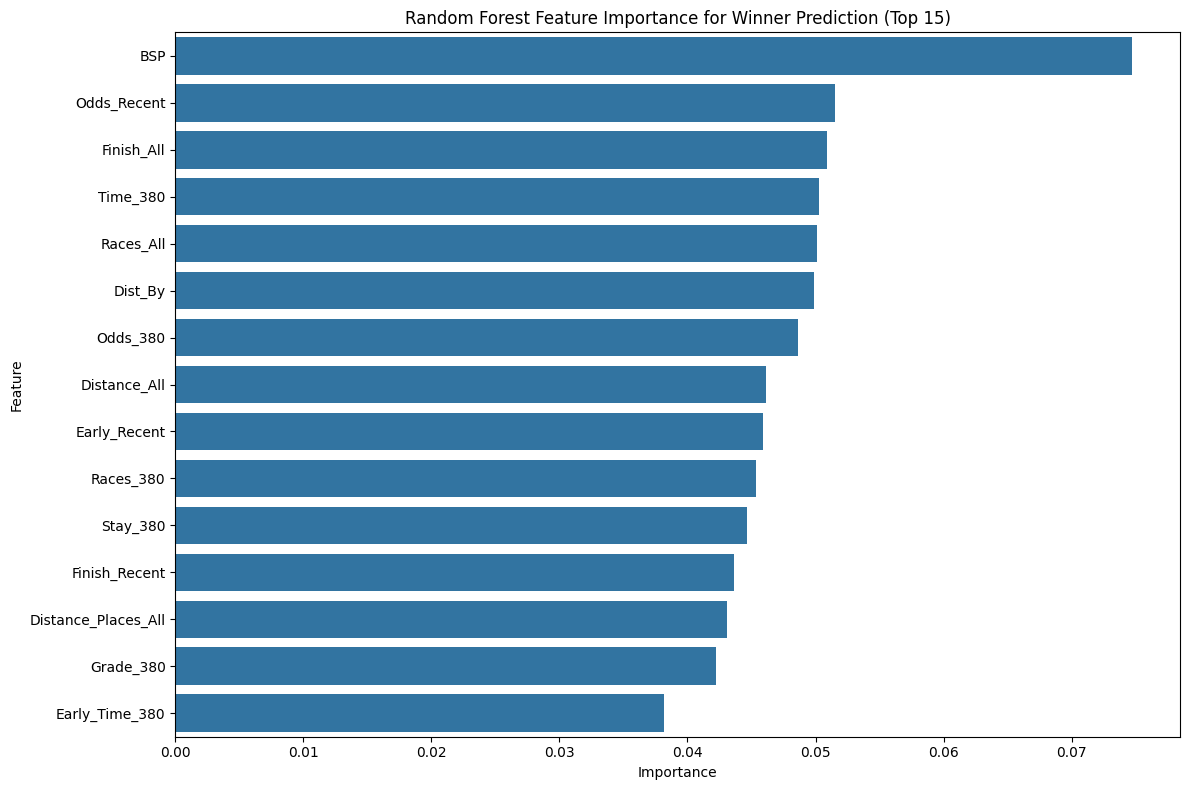

In [9]:
# Random Forest for binary classification (Winner prediction)
rf_winner = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_winner.fit(X_train_scaled, y_winner_train)

# Make predictions
y_winner_pred_rf = rf_winner.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_winner_test, y_winner_pred_rf)
print(f"Random Forest Accuracy for Winner Prediction: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_winner_test, y_winner_pred_rf))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_winner.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature')
plt.title('Random Forest Feature Importance for Winner Prediction (Top 15)')
plt.tight_layout()
plt.show()

Gradient Boosting Accuracy for Finished Position: 0.2302

Classification Report:
              precision    recall  f1-score   support

           1       0.24      0.36      0.29       398
           2       0.19      0.18      0.18       357
           3       0.20      0.16      0.18       395
           4       0.25      0.17      0.20       413
           5       0.22      0.18      0.19       410
           6       0.27      0.31      0.29       429

    accuracy                           0.23      2402
   macro avg       0.23      0.23      0.22      2402
weighted avg       0.23      0.23      0.22      2402


Feature Importance (Top 10):
                Feature  Importance
2                   BSP    0.201742
6            Finish_All    0.058183
24              Dist_By    0.054245
5          Distance_All    0.053299
7   Distance_Places_All    0.052308
10        Finish_Recent    0.051733
11          Odds_Recent    0.050648
19             Time_380    0.049075
21             Stay_38

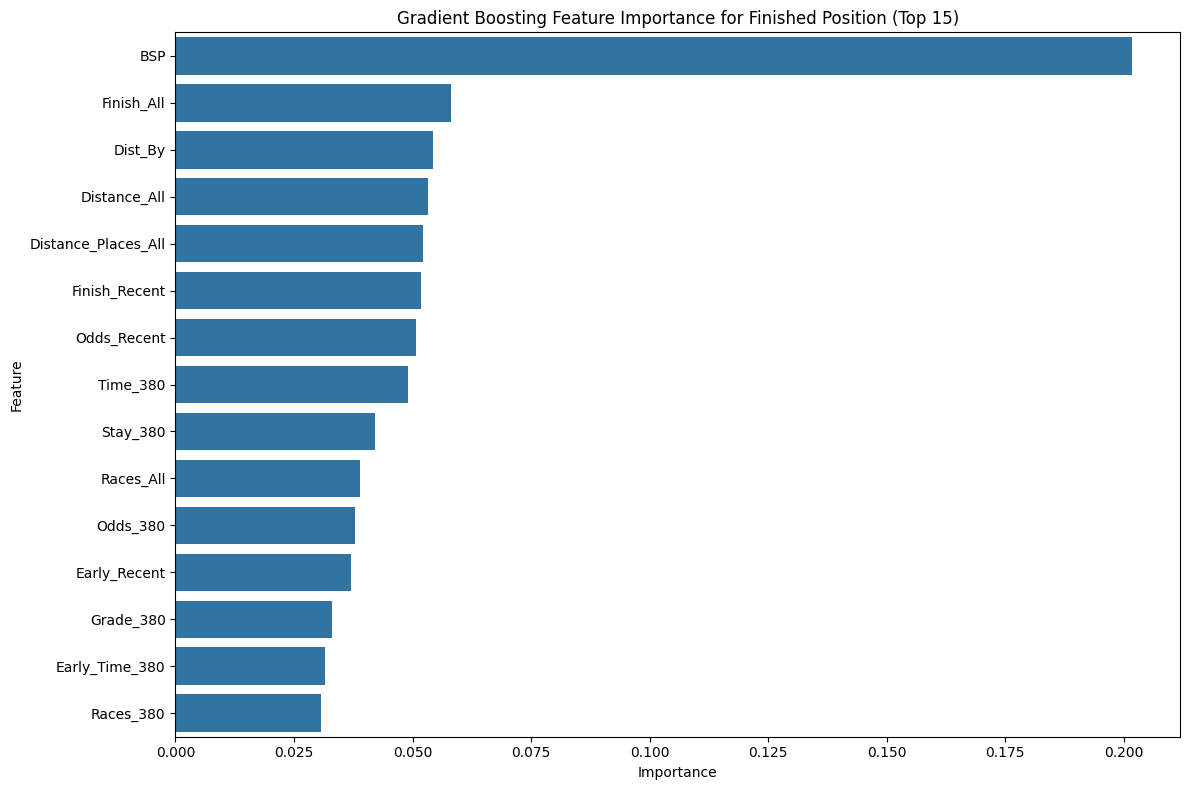

In [10]:
# Gradient Boosting for multiclass classification (Finished position prediction)
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_finished = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_finished.fit(X_train_scaled, y_finished_train)

# Make predictions
y_finished_pred_gb = gb_finished.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_finished_test, y_finished_pred_gb)
print(f"Gradient Boosting Accuracy for Finished Position: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_finished_test, y_finished_pred_gb))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_finished.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature')
plt.title('Gradient Boosting Feature Importance for Finished Position (Top 15)')
plt.tight_layout()
plt.show()

Gradient Boosting Accuracy for Winner Prediction: 0.8339

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2004
           1       0.40      0.01      0.01       398

    accuracy                           0.83      2402
   macro avg       0.62      0.50      0.46      2402
weighted avg       0.76      0.83      0.76      2402


Feature Importance (Top 10):
         Feature  Importance
2            BSP    0.384240
1           Odds    0.056416
12  Early_Recent    0.052239
5   Distance_All    0.047737
19      Time_380    0.046584
16      Odds_380    0.045637
21      Stay_380    0.037754
24       Dist_By    0.034434
11   Odds_Recent    0.031570
18     Grade_380    0.028785


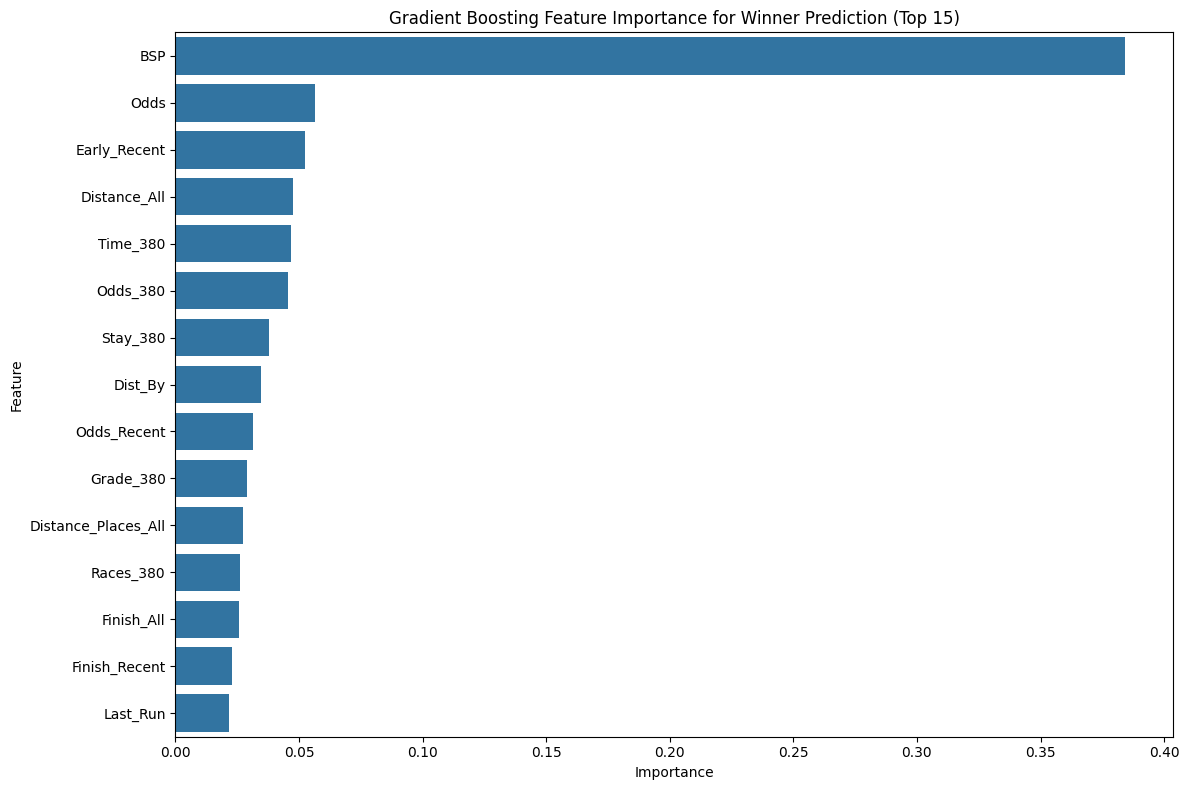

In [11]:
# Gradient Boosting for binary classification (Winner prediction)
gb_winner = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_winner.fit(X_train_scaled, y_winner_train)

# Make predictions
y_winner_pred_gb = gb_winner.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_winner_test, y_winner_pred_gb)
print(f"Gradient Boosting Accuracy for Winner Prediction: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_winner_test, y_winner_pred_gb))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_winner.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature')
plt.title('Gradient Boosting Feature Importance for Winner Prediction (Top 15)')
plt.tight_layout()
plt.show()

In [12]:
# Bagging Classifier for multiclass classification (Finished position prediction)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
base_estimator = DecisionTreeClassifier(random_state=42)
bagging_finished = BaggingClassifier(estimator=base_estimator, 
                                     n_estimators=100, 
                                     random_state=42)

# Train the model
bagging_finished.fit(X_train_scaled, y_finished_train)

# Make predictions
y_finished_pred_bagging = bagging_finished.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_finished_test, y_finished_pred_bagging)
print(f"Bagging Classifier Accuracy for Finished Position: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_finished_test, y_finished_pred_bagging))

Bagging Classifier Accuracy for Finished Position: 0.2082

Classification Report:
              precision    recall  f1-score   support

           1       0.22      0.28      0.25       398
           2       0.17      0.19      0.18       357
           3       0.17      0.16      0.16       395
           4       0.21      0.17      0.19       413
           5       0.20      0.18      0.19       410
           6       0.28      0.27      0.27       429

    accuracy                           0.21      2402
   macro avg       0.21      0.21      0.21      2402
weighted avg       0.21      0.21      0.21      2402



In [13]:
# Bagging Classifier for binary classification (Winner prediction)
base_estimator = DecisionTreeClassifier(random_state=42)
bagging_winner = BaggingClassifier(estimator=base_estimator, 
                                   n_estimators=100, 
                                   random_state=42)

# Train the model
bagging_winner.fit(X_train_scaled, y_winner_train)

# Make predictions
y_winner_pred_bagging = bagging_winner.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_winner_test, y_winner_pred_bagging)
print(f"Bagging Classifier Accuracy for Winner Prediction: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_winner_test, y_winner_pred_bagging))

Bagging Classifier Accuracy for Winner Prediction: 0.8297

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2004
           1       0.28      0.02      0.03       398

    accuracy                           0.83      2402
   macro avg       0.56      0.50      0.47      2402
weighted avg       0.74      0.83      0.76      2402



AdaBoost Accuracy for Finished Position: 0.2177

Classification Report:
              precision    recall  f1-score   support

           1       0.26      0.30      0.28       398
           2       0.19      0.24      0.21       357
           3       0.18      0.16      0.17       395
           4       0.20      0.11      0.14       413
           5       0.19      0.15      0.17       410
           6       0.26      0.34      0.30       429

    accuracy                           0.22      2402
   macro avg       0.21      0.22      0.21      2402
weighted avg       0.21      0.22      0.21      2402


Feature Importance (Top 10):
                Feature  Importance
2                   BSP    0.653990
8             Races_All    0.058814
21             Stay_380    0.057199
19             Time_380    0.034846
6            Finish_All    0.033277
13            Races_380    0.032102
7   Distance_Places_All    0.029469
15           Finish_380    0.022997
1                  Odds    0.01

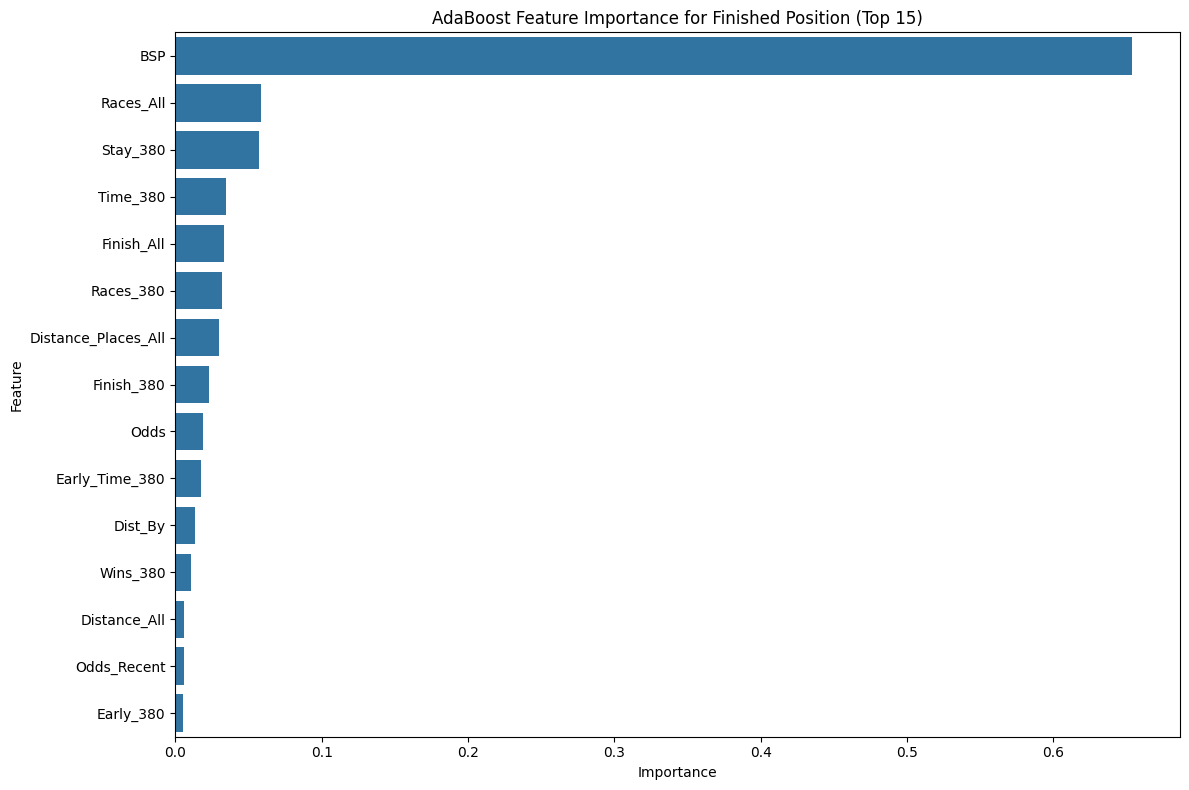

In [14]:
# AdaBoost for multiclass classification (Finished position prediction)
from sklearn.ensemble import AdaBoostClassifier

# Initialize the model
adaboost_finished = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                       n_estimators=100,
                                       random_state=42)

# Train the model
adaboost_finished.fit(X_train_scaled, y_finished_train)

# Make predictions
y_finished_pred_ada = adaboost_finished.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_finished_test, y_finished_pred_ada)
print(f"AdaBoost Accuracy for Finished Position: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_finished_test, y_finished_pred_ada))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': adaboost_finished.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature')
plt.title('AdaBoost Feature Importance for Finished Position (Top 15)')
plt.tight_layout()
plt.show()

AdaBoost Accuracy for Winner Prediction: 0.8343

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2004
           1       0.00      0.00      0.00       398

    accuracy                           0.83      2402
   macro avg       0.42      0.50      0.45      2402
weighted avg       0.70      0.83      0.76      2402


Feature Importance (Top 10):
                Feature  Importance
2                   BSP    0.993489
15           Finish_380    0.006511
0                  Trap    0.000000
3       Public_Estimate    0.000000
1                  Odds    0.000000
5          Distance_All    0.000000
6            Finish_All    0.000000
7   Distance_Places_All    0.000000
4              Last_Run    0.000000
8             Races_All    0.000000


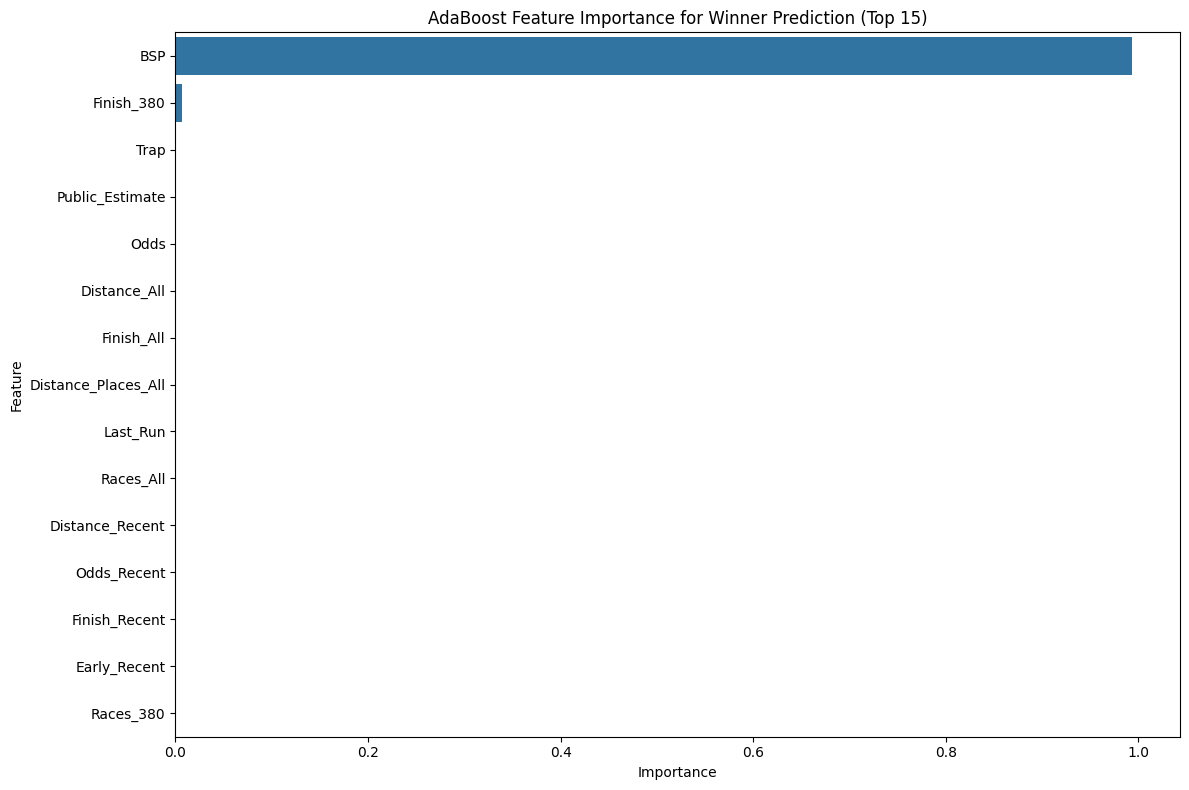

In [15]:
# AdaBoost for binary classification (Winner prediction)
adaboost_winner = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                     n_estimators=100,
                                     random_state=42)

# Train the model
adaboost_winner.fit(X_train_scaled, y_winner_train)

# Make predictions
y_winner_pred_ada = adaboost_winner.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_winner_test, y_winner_pred_ada)
print(f"AdaBoost Accuracy for Winner Prediction: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_winner_test, y_winner_pred_ada))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': adaboost_winner.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature')
plt.title('AdaBoost Feature Importance for Winner Prediction (Top 15)')
plt.tight_layout()
plt.show()

XGBoost Accuracy for Finished Position: 0.2348

Classification Report:
              precision    recall  f1-score   support

           1       0.25      0.36      0.30       398
           2       0.22      0.23      0.23       357
           3       0.19      0.16      0.18       395
           4       0.23      0.15      0.18       413
           5       0.20      0.17      0.18       410
           6       0.29      0.33      0.31       429

    accuracy                           0.23      2402
   macro avg       0.23      0.23      0.23      2402
weighted avg       0.23      0.23      0.23      2402


Feature Importance (Top 10):
            Feature  Importance
2               BSP    0.080117
13        Races_380    0.042266
3   Public_Estimate    0.041326
21         Stay_380    0.041186
19         Time_380    0.040889
8         Races_All    0.040480
6        Finish_All    0.039706
16         Odds_380    0.039363
24          Dist_By    0.039332
11      Odds_Recent    0.038768


<Figure size 1200x800 with 0 Axes>

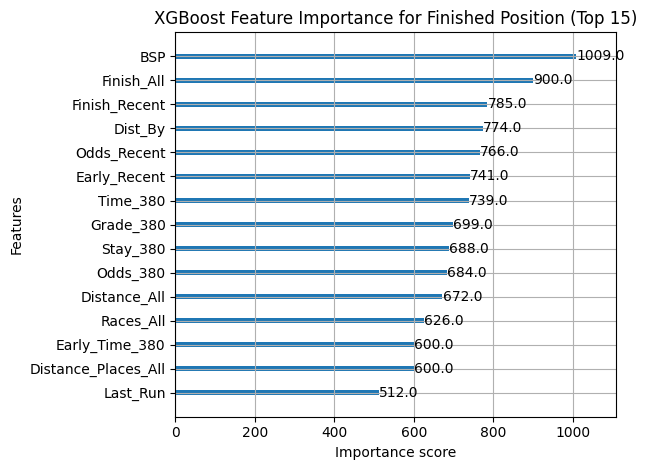

In [16]:
# XGBoost for multiclass classification (Finished position prediction)
import xgboost as xgb

# Transform the target variable to be zero-indexed
y_finished_train_xgb = y_finished_train - 1
y_finished_test_xgb = y_finished_test - 1

# Initialize the model
xgb_finished = xgb.XGBClassifier(n_estimators=100, 
                                 learning_rate=0.1, 
                                 max_depth=5,
                                 random_state=42)

# Train the model
xgb_finished.fit(X_train_scaled, y_finished_train_xgb)

# Make predictions
y_finished_pred_xgb = xgb_finished.predict(X_test_scaled)

# Convert predictions back to original scale (1-6)
y_finished_pred_xgb = y_finished_pred_xgb + 1

# Evaluate the model
accuracy = accuracy_score(y_finished_test, y_finished_pred_xgb)
print(f"XGBoost Accuracy for Finished Position: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_finished_test, y_finished_pred_xgb))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_finished.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_finished, max_num_features=15)
plt.title('XGBoost Feature Importance for Finished Position (Top 15)')
plt.tight_layout()
plt.show()

XGBoost Accuracy for Winner Prediction: 0.8331

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2004
           1       0.42      0.02      0.04       398

    accuracy                           0.83      2402
   macro avg       0.63      0.51      0.47      2402
weighted avg       0.77      0.83      0.76      2402


Feature Importance (Top 10):
      Feature  Importance
2         BSP    0.128410
1        Odds    0.055714
24    Dist_By    0.040492
23   Wide_380    0.040195
17  Early_380    0.039603
16   Odds_380    0.039091
13  Races_380    0.038772
18  Grade_380    0.038447
21   Stay_380    0.038356
19   Time_380    0.037606


<Figure size 1200x800 with 0 Axes>

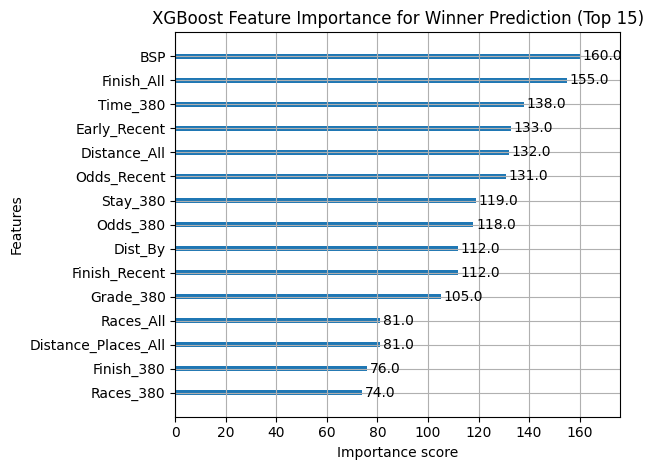

In [17]:
# XGBoost for binary classification (Winner prediction)
xgb_winner = xgb.XGBClassifier(n_estimators=100, 
                               learning_rate=0.1, 
                               max_depth=5,
                               random_state=42)

# Train the model
xgb_winner.fit(X_train_scaled, y_winner_train)

# Make predictions
y_winner_pred_xgb = xgb_winner.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_winner_test, y_winner_pred_xgb)
print(f"XGBoost Accuracy for Winner Prediction: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_winner_test, y_winner_pred_xgb))

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_winner.feature_importances_
})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Top 10):")
print(feat_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_winner, max_num_features=15)
plt.title('XGBoost Feature Importance for Winner Prediction (Top 15)')
plt.tight_layout()
plt.show()

Model Comparison for Finished Position Prediction:
                Model  Accuracy
5             XGBoost  0.234804
2   Gradient Boosting  0.230225
4            AdaBoost  0.217735
3  Bagging Classifier  0.208160
1       Random Forest  0.207744
0       Decision Tree  0.182348


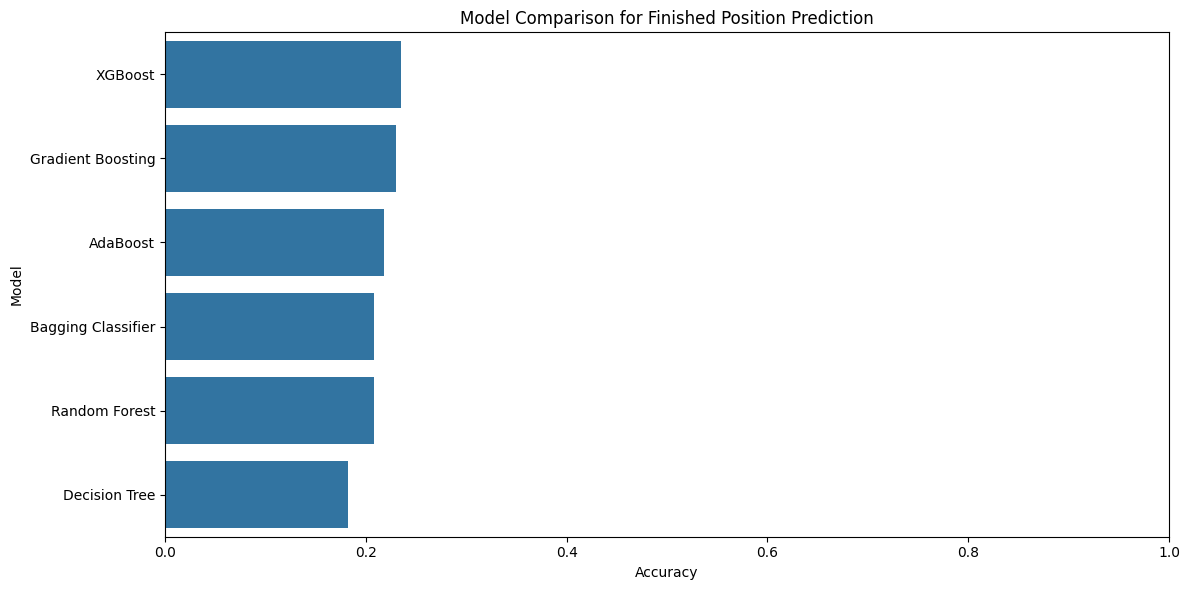

In [18]:
# Compare model performance for Finished position prediction
models_finished = {
    'Decision Tree': y_finished_pred,
    'Random Forest': y_finished_pred_rf,
    'Gradient Boosting': y_finished_pred_gb,
    'Bagging Classifier': y_finished_pred_bagging,
    'AdaBoost': y_finished_pred_ada,
    'XGBoost': y_finished_pred_xgb
}

accuracies_finished = {}
for name, predictions in models_finished.items():
    accuracies_finished[name] = accuracy_score(y_finished_test, predictions)

# Create a DataFrame for comparison
comparison_finished = pd.DataFrame({
    'Model': list(accuracies_finished.keys()),
    'Accuracy': list(accuracies_finished.values())
}).sort_values('Accuracy', ascending=False)

print("Model Comparison for Finished Position Prediction:")
print(comparison_finished)

# Plot comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_finished, x='Accuracy', y='Model')
plt.title('Model Comparison for Finished Position Prediction')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

Model Comparison for Winner Prediction:
                 Model  Accuracy
0  Logistic Regression  0.834305
5             AdaBoost  0.834305
3    Gradient Boosting  0.833888
6              XGBoost  0.833056
2        Random Forest  0.832223
4   Bagging Classifier  0.829725
1        Decision Tree  0.734804


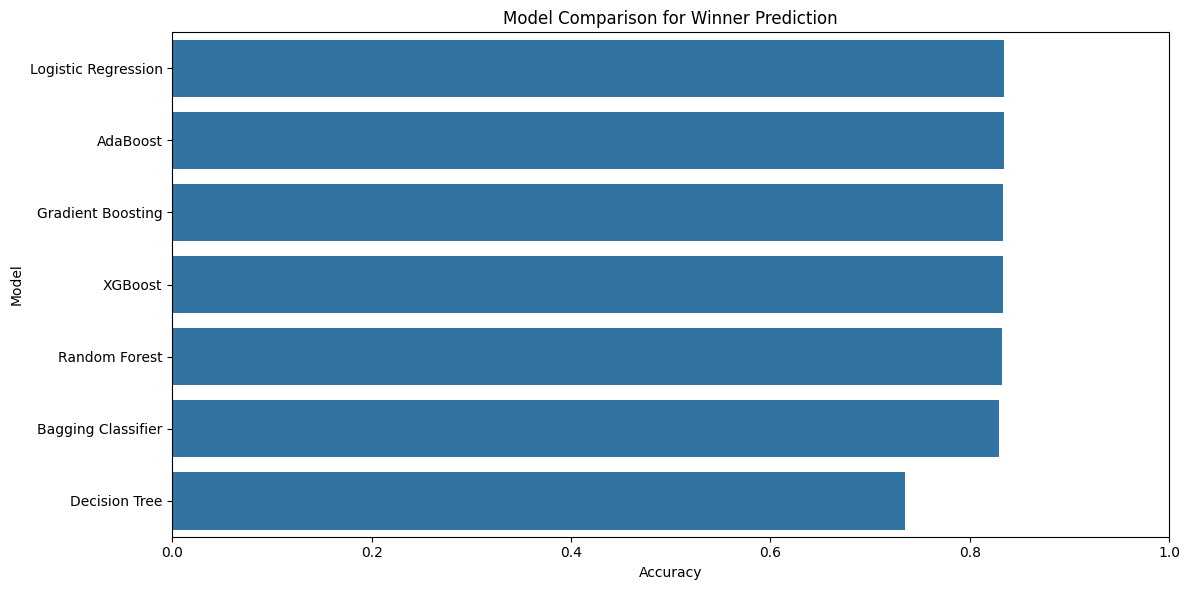

In [19]:
# Compare model performance for Winner prediction
models_winner = {
    'Logistic Regression': y_winner_pred,
    'Decision Tree': y_winner_pred_dt,
    'Random Forest': y_winner_pred_rf,
    'Gradient Boosting': y_winner_pred_gb,
    'Bagging Classifier': y_winner_pred_bagging,
    'AdaBoost': y_winner_pred_ada,
    'XGBoost': y_winner_pred_xgb
}

accuracies_winner = {}
for name, predictions in models_winner.items():
    accuracies_winner[name] = accuracy_score(y_winner_test, predictions)

# Create a DataFrame for comparison
comparison_winner = pd.DataFrame({
    'Model': list(accuracies_winner.keys()),
    'Accuracy': list(accuracies_winner.values())
}).sort_values('Accuracy', ascending=False)

print("Model Comparison for Winner Prediction:")
print(comparison_winner)

# Plot comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_winner, x='Accuracy', y='Model')
plt.title('Model Comparison for Winner Prediction')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

## Analysis of Model Performance in Greyhound Racing Prediction
The graph for finished position prediction reveals notably poor performance across all tree-based models:
- XGBoost performs best but still only achieves approximately 25% accuracy. 
- Gradient Boosting, Bagging Classifier, AdaBoost, and Random Forest deliver similar performance (around 22-23%)
- Decision Tree performs worst at roughly 18% accuracy.

Possible reasons:
1. Multiclass complexity: Predicting exact finishing positions (1-6) is inherently more difficult than binary classification. With 6 possible outcomes, even a random guess would yield about 16.7% accuracy, so our models only just barely beat chance.
2. Racing is a complex process: there are numerous unpredictable factors involved in racing, such as interactions between dogs during the race, unexpected behavior (such as falls), and subtle race dynamics that aren't captured in the feature set.
3. Lack of sequential data: Racing is a dynamic process, but we are working with static features to predict a dynamic process, contributing to the error term $u_i$.

In contrast, the models perform much better on the binary classification task of winner prediction:
- Most models achieve approximately 85% accuracy, with Decision Tree lagging behind the rest at a respectable 75% accuracy.

Possible reasons:
1. Simpler task: Predicting a win/not a win is fundamentally an easier task than predicting finishing position.
2. Better feature relevance: the features available appear to be good predictors of winning potential but less so at distinguishing between various finishing positions.

## Practical Implications
The results suggest that betting strategies focused on picking winners have more edge than strategies focused on predicting finishing places. For advanced modelling approaches, it might be worth simplifying the exact position prediction to buckets of "top 3" and/or "bottom 3", since this is both an easier classification task, but often also corresponds to available bets with the bookie. They might not make you a market on exact finishers 1-6, because the bookie's risk of ruin would be too high if they took the other side.

Of course, throwing in additional predictors might help. Further work could look into using a neural network to perform the same two classification tasks (binary - win/not win) and (multiclass - finished position).

Loading and preparing data...


[I 2025-03-30 22:28:53,587] A new study created in memory with name: no-name-1cccb9ab-8dea-4b4a-b699-4a0098d28b4f


Starting hyperparameter optimization...
Performing hyperparameter optimization...


[I 2025-03-30 22:29:03,721] Trial 0 finished with value: 0.17604166666666668 and parameters: {'learning_rate': 0.00931374196762986, 'num_leaves': 73, 'max_depth': 15, 'min_data_in_leaf': 64, 'lambda_l1': 0.47321900927896177, 'lambda_l2': 4.117240611714655, 'bagging_fraction': 0.7317062999147022, 'bagging_freq': 2, 'feature_fraction': 0.8132782505241525}. Best is trial 0 with value: 0.17604166666666668.
[I 2025-03-30 22:29:05,952] Trial 1 finished with value: 0.17552083333333332 and parameters: {'learning_rate': 0.02243074590519818, 'num_leaves': 89, 'max_depth': 7, 'min_data_in_leaf': 86, 'lambda_l1': 0.6360838869106121, 'lambda_l2': 5.412857902358591, 'bagging_fraction': 0.5698619759127319, 'bagging_freq': 4, 'feature_fraction': 0.9367446525915417}. Best is trial 0 with value: 0.17604166666666668.
[I 2025-03-30 22:29:11,082] Trial 2 finished with value: 0.146875 and parameters: {'learning_rate': 0.08530280823125137, 'num_leaves': 74, 'max_depth': 15, 'min_data_in_leaf': 21, 'lambda_l1

Optimization completed in 1.82 minutes
Best accuracy achieved: 0.1776
Best parameters:
  learning_rate: 0.028751513162759444
  num_leaves: 98
  max_depth: 11
  min_data_in_leaf: 75
  lambda_l1: 0.8380574503346236
  lambda_l2: 6.730341481657854
  bagging_fraction: 0.6134770538258192
  bagging_freq: 2
  feature_fraction: 0.9986044346262422
Training final model with optimized parameters...
LambdaMART Accuracy with Optimized Parameters: 0.1692


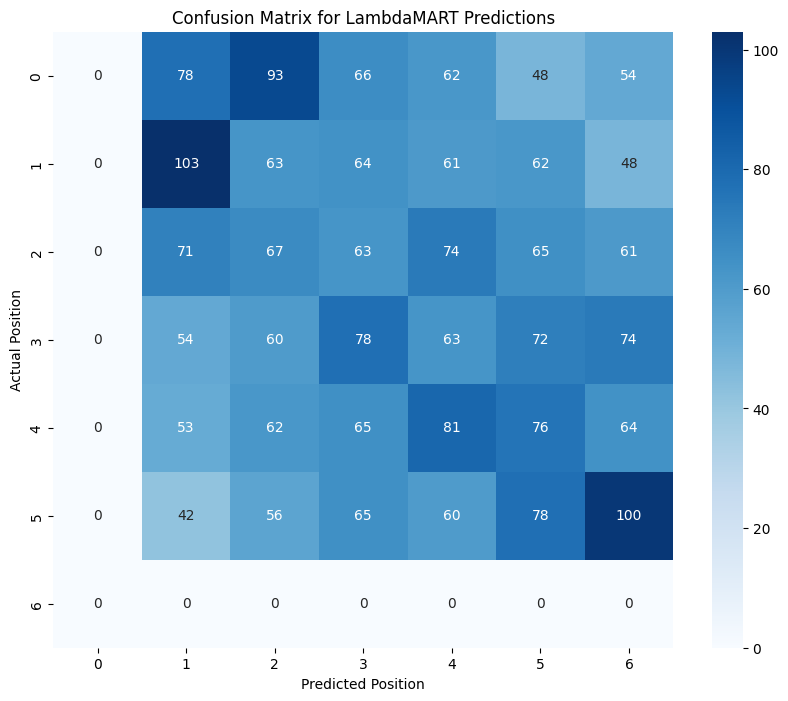


Top 10 Important Features:
          Feature  Importance
2             BSP        3243
6      Finish_All        3218
24        Dist_By        3039
11    Odds_Recent        2807
19       Time_380        2644
16       Odds_380        2508
18      Grade_380        2468
8       Races_All        2457
10  Finish_Recent        2434
12   Early_Recent        2395


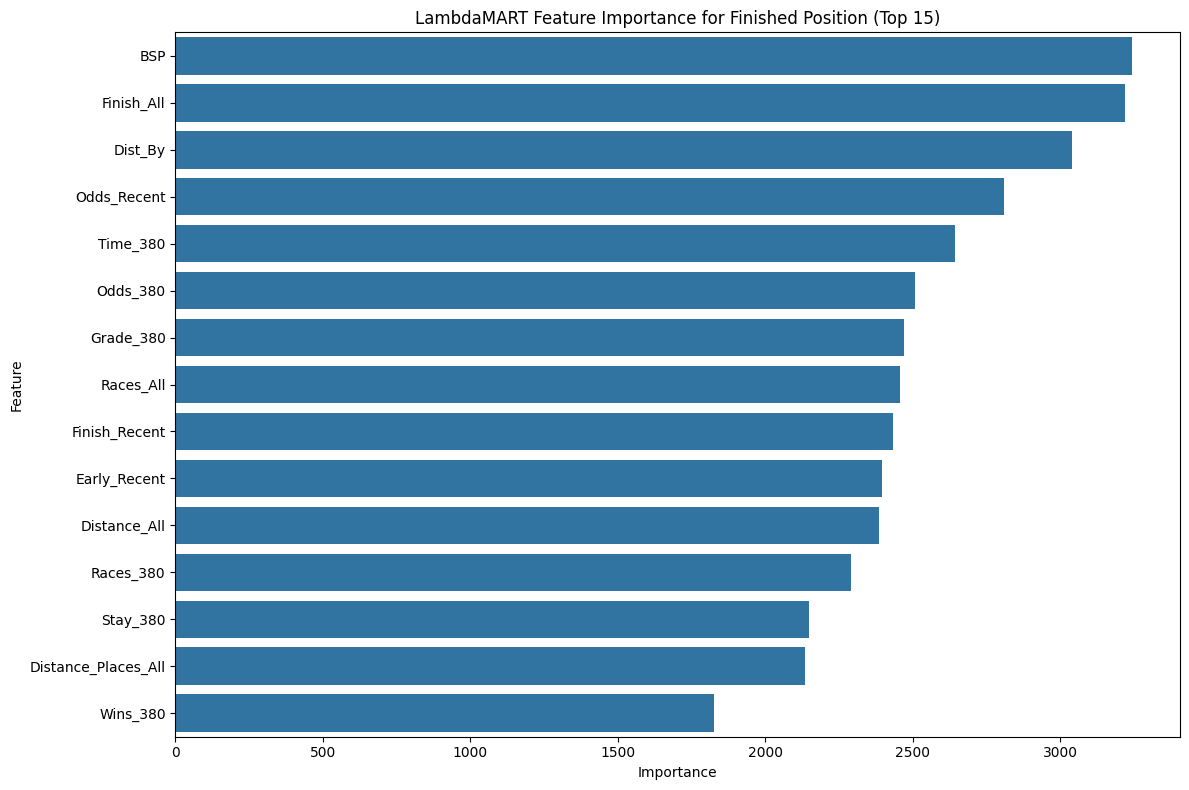

<Figure size 1000x600 with 0 Axes>

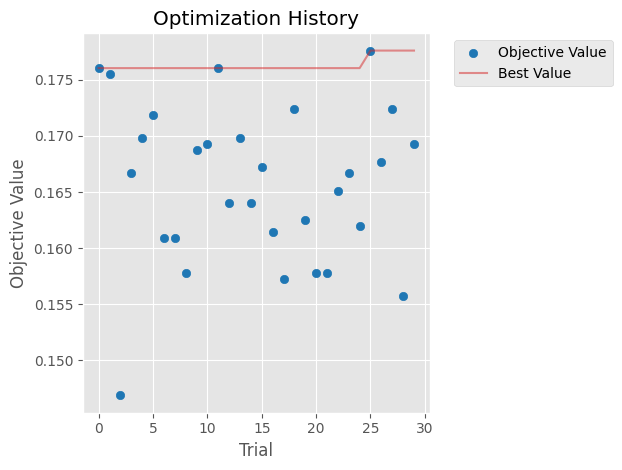

<Figure size 1200x800 with 0 Axes>

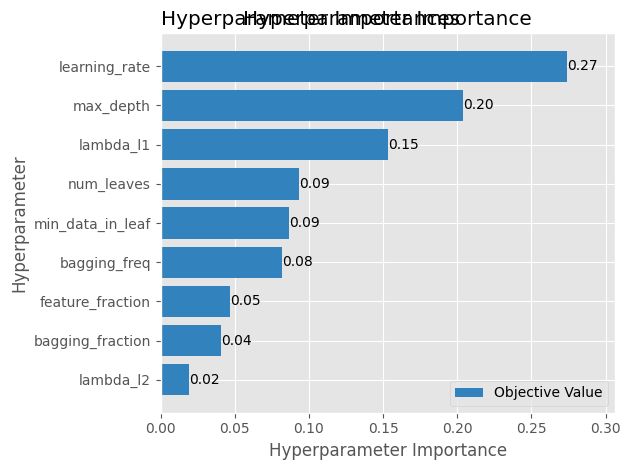

<Figure size 1400x800 with 0 Axes>

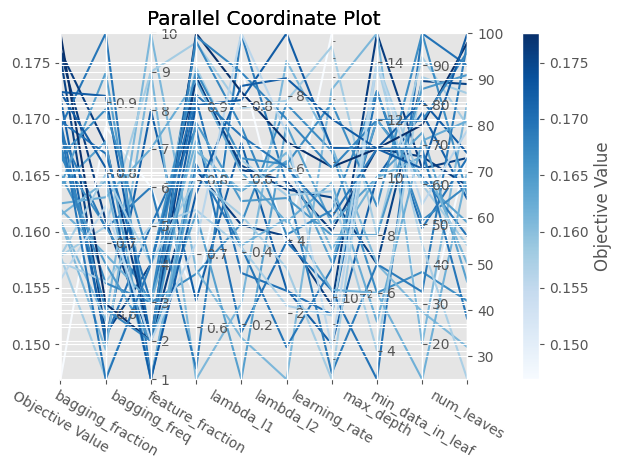

In [27]:
# LambdaMART Implementation with Optuna for Hyperparameter Optimization
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Data loading and preparation
print("Loading and preparing data...")
data = pd.read_csv('data/data_final.csv')

# Group races together using Race_ID
group_ids = data['Race_ID'].values

# Prepare features and target
X = data.drop(['Finished', 'Winner', 'Race_ID'], axis=1)
X = X.select_dtypes(include=[np.number])  # Keep only numeric features
y = data['Finished'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data while preserving race grouping
gkf = GroupKFold(n_splits=5)
train_idx, test_idx = next(gkf.split(X_scaled, y, groups=group_ids))

X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
y_train, y_test = y[train_idx], y[test_idx]
groups_train = group_ids[train_idx]
groups_test = group_ids[test_idx]

# Create validation dataset for hyperparameter tuning
train_idx2, val_idx = next(gkf.split(X_train, y_train, groups=groups_train))
X_train_opt, X_val = X_train.iloc[train_idx2], X_train.iloc[val_idx]
y_train_opt, y_val = y_train[train_idx2], y_train[val_idx]
groups_train_opt = groups_train[train_idx2]
groups_val = groups_train[val_idx]

# Function to convert predictions to race rankings
def convert_to_rankings(predictions, groups):
    final_predictions = []
    unique_groups = np.unique(groups)
    
    for group_id in unique_groups:
        race_indices = np.where(groups == group_id)[0]
        race_preds = predictions[race_indices]
        race_ranks = len(race_indices) + 1 - np.argsort(np.argsort(-race_preds))
        final_predictions.extend(race_ranks)
    
    return np.array(final_predictions)

# Define Optuna objective function
def objective(trial):
    # Create LightGBM datasets for this trial
    dtrain = lgb.Dataset(
        X_train_opt, 
        label=y_train_opt,
        group=np.bincount(groups_train_opt)[np.nonzero(np.bincount(groups_train_opt))]
    )
    
    dval = lgb.Dataset(
        X_val, 
        label=y_val, 
        group=np.bincount(groups_val)[np.nonzero(np.bincount(groups_val))],
        reference=dtrain
    )
    
    # Define hyperparameters to optimize
    params = {
        'objective': 'lambdarank',
        'metric': 'ndcg',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 1.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 10.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
        'verbose': -1
    }
    
    # Train model with early stopping
    model = lgb.train(
        params,
        dtrain,
        num_boost_round=200,
        valid_sets=[dval]
    )
    
    # Make predictions
    predictions = model.predict(X_val)
    
    # Convert to rankings and calculate accuracy
    final_predictions = convert_to_rankings(predictions, groups_val)
    accuracy = accuracy_score(y_val, final_predictions)
    
    return accuracy

# Run Optuna optimization
print("Starting hyperparameter optimization...")
start_time = time.time()
study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())

# Estimate time for optimization
n_trials = 30  # Adjust based on your computational resources

print("Performing hyperparameter optimization...")
study.optimize(objective, n_trials=n_trials)
optimization_time = time.time() - start_time
print(f"Optimization completed in {optimization_time/60:.2f} minutes")

# Get best parameters
best_params = study.best_params
best_value = study.best_value
print(f"Best accuracy achieved: {best_value:.4f}")
print("Best parameters:")
for param, value in best_params.items():
    print(f"  {param}: {value}")

# Create LightGBM datasets for final training
train_data = lgb.Dataset(
    X_train, 
    label=y_train,
    group=np.bincount(groups_train)[np.nonzero(np.bincount(groups_train))]
)

test_data = lgb.Dataset(
    X_test, 
    label=y_test, 
    group=np.bincount(groups_test)[np.nonzero(np.bincount(groups_test))],
    reference=train_data
)

# Set up final parameters
final_params = {
    'objective': 'lambdarank',
    'metric': 'ndcg',
    'boosting_type': 'gbdt',
    'verbose': -1,
    **best_params  # Include all optimized parameters
}

# Train the final model with the best parameters
print("Training final model with optimized parameters...")
final_model = lgb.train(
    final_params,
    train_data,
    num_boost_round=1000,  # Use more rounds for final model
    valid_sets=[test_data]
)

# Make predictions
predictions = final_model.predict(X_test)

# Convert to rankings
final_predictions = convert_to_rankings(predictions, groups_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, final_predictions)
print(f"LambdaMART Accuracy with Optimized Parameters: {accuracy:.4f}")

# Create a confusion matrix
cm = confusion_matrix(y_test, final_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Position')
plt.ylabel('Actual Position')
plt.title('Confusion Matrix for LambdaMART Predictions')
plt.show()

# Feature importance
feature_importance = final_model.feature_importance()
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(importance_df.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature')
plt.title('LambdaMART Feature Importance for Finished Position (Top 15)')
plt.tight_layout()
plt.show()

# Visualization of optimization history
plt.figure(figsize=(10, 6))
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.title('Optimization History')
plt.tight_layout()
plt.show()

# Importance of hyperparameters
plt.figure(figsize=(12, 8))
optuna.visualization.matplotlib.plot_param_importances(study)
plt.title('Hyperparameter Importance')
plt.tight_layout()
plt.show()

# Parallel coordinate plot
plt.figure(figsize=(14, 8))
optuna.visualization.matplotlib.plot_parallel_coordinate(study)
plt.title('Parallel Coordinate Plot')
plt.tight_layout()
plt.show()

It seems that LambdaMART Learning to Rank also performs very poorly, worse, in fact, than pure luck. Even playing with the tuning parameters likely would not much improve our results, so let's reformulate the problem slightly, to predict whether a dog will "place" or not - i.e. end up in the top 3 or not. We will again use LambdaMART, making use of its ranking capabilities, but mapping outputs to binary 0 or 1. 

Within each race, the dogs with the top 3 predicted scores are classified as "Top 3" finishers.

We will again use Optuna to find the best parameters specifically for this binary classification task. 

I predict this approach will lead to a far higher accuracy score because the task is a lot simpler (mapping to 0 or 1 rather than values 1-6). I also suspect that since the binary target has stronger signals in the feature set. Additionally, predicting whether a dog will "place" is a valid betting strategy which bookmakers will often make a market for.


[I 2025-03-31 12:07:47,618] A new study created in memory with name: no-name-7074237f-a1a3-41ee-a8ef-81f73d139ba4


Starting hyperparameter optimization...


[I 2025-03-31 12:07:48,346] Trial 0 finished with value: 0.5848956393626166 and parameters: {'learning_rate': 0.08977558055102136, 'num_leaves': 48, 'max_depth': 3, 'min_data_in_leaf': 36, 'lambda_l1': 0.13845363335315908, 'lambda_l2': 4.334541188544218, 'bagging_fraction': 0.9557071684958126, 'bagging_freq': 5, 'feature_fraction': 0.7441902353707722}. Best is trial 0 with value: 0.5848956393626166.
[I 2025-03-31 12:07:50,280] Trial 1 finished with value: 0.5836456383866633 and parameters: {'learning_rate': 0.010480101025862292, 'num_leaves': 55, 'max_depth': 4, 'min_data_in_leaf': 41, 'lambda_l1': 0.7866849073897139, 'lambda_l2': 3.8614799084963085, 'bagging_fraction': 0.6154856874853604, 'bagging_freq': 6, 'feature_fraction': 0.7899729492261667}. Best is trial 0 with value: 0.5848956393626166.
[I 2025-03-31 12:07:51,696] Trial 2 finished with value: 0.5821871737876122 and parameters: {'learning_rate': 0.031998022708753016, 'num_leaves': 21, 'max_depth': 10, 'min_data_in_leaf': 35, 'l

Best accuracy in CV: 0.5941
Best parameters:
  learning_rate: 0.018081788155351573
  num_leaves: 88
  max_depth: 7
  min_data_in_leaf: 25
  lambda_l1: 0.001248108010981519
  lambda_l2: 1.833595212612368
  bagging_fraction: 0.8222277802862943
  bagging_freq: 3
  feature_fraction: 0.8518373705628577
Training final model with best parameters...
Making predictions and evaluating model...
Accuracy for Top 3 prediction: 0.5752

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      1203
           1       0.58      0.58      0.58      1203

    accuracy                           0.58      2406
   macro avg       0.58      0.58      0.58      2406
weighted avg       0.58      0.58      0.58      2406



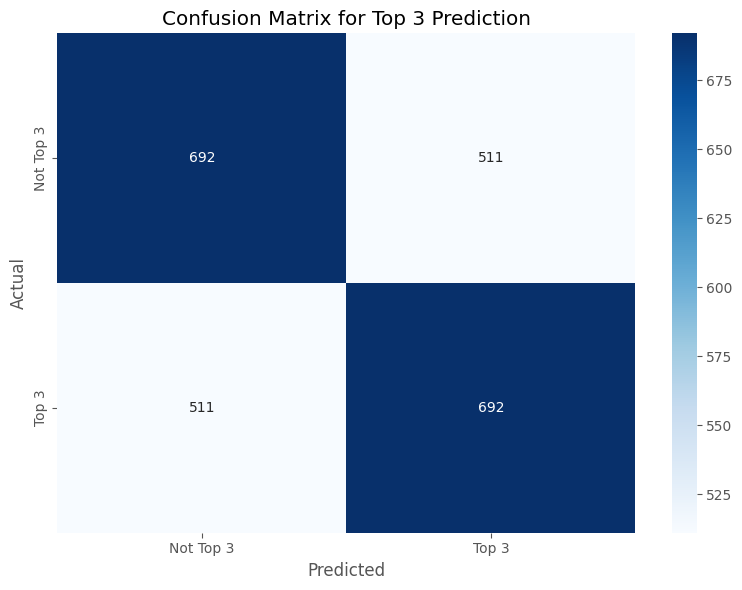


Top 10 Important Features:
          Feature  Importance
2             BSP        1756
6      Finish_All        1550
24        Dist_By        1494
12   Early_Recent        1355
11    Odds_Recent        1344
19       Time_380        1289
8       Races_All        1261
16       Odds_380        1242
5    Distance_All        1189
10  Finish_Recent        1166


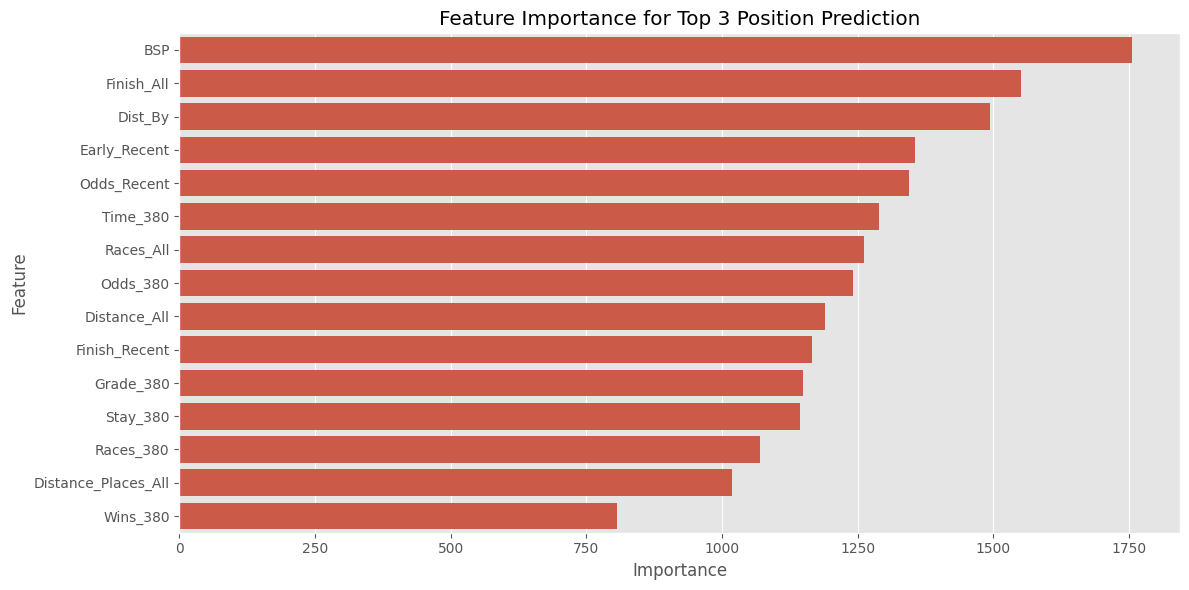


Class distribution in test set: 50.0% Top 3, 50.0% Not Top 3
Baseline accuracy (always predict majority class): 0.5000
Improvement over baseline: 0.0752


<Figure size 1000x600 with 0 Axes>

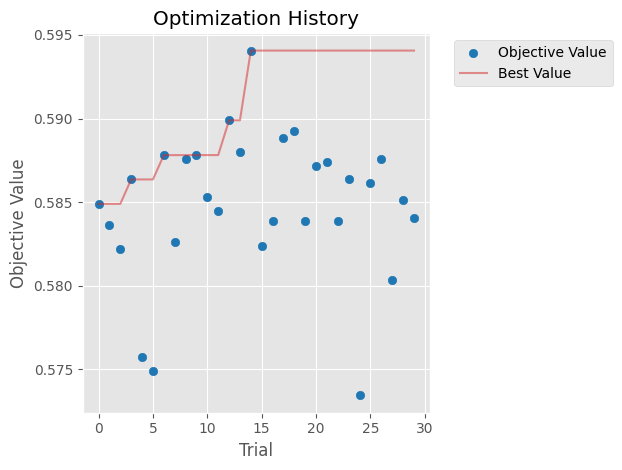

<Figure size 1000x600 with 0 Axes>

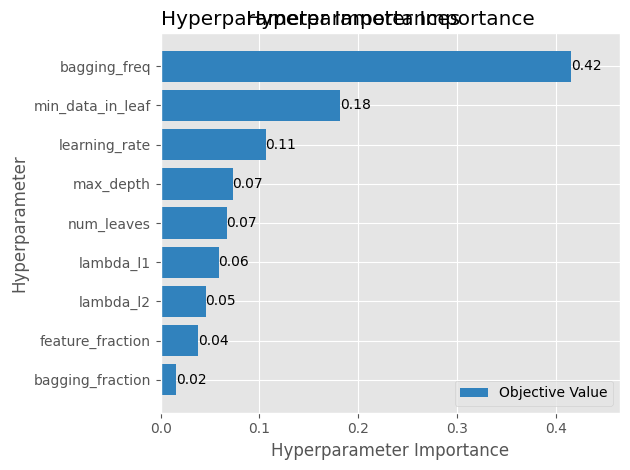

In [29]:
data = pd.read_csv('data/data_final.csv')

# Create binary target: Top 3 (1) vs Not Top 3 (0)
data['Top3'] = (data['Finished'] <= 3).astype(int)

# Group races together using Race_ID
group_ids = data['Race_ID'].values

# Prepare features and target
X = data.drop(['Finished', 'Winner', 'Race_ID', 'Top3'], axis=1)
X = X.select_dtypes(include=[np.number])  # Keep only numeric features
y_binary = data['Top3'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data while preserving race grouping
gkf = GroupKFold(n_splits=5)
train_idx, test_idx = next(gkf.split(X_scaled, y_binary, groups=group_ids))

X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
y_train, y_test = y_binary[train_idx], y_binary[test_idx]
groups_train = group_ids[train_idx]
groups_test = group_ids[test_idx]

# Function to convert predictions to binary classification (Top 3 or not)
def convert_to_top3_classification(predictions, groups):
    final_predictions = []
    unique_groups = np.unique(groups)
    
    for group_id in unique_groups:
        # Get indices for this race
        race_indices = np.where(groups == group_id)[0]
        
        # Get predictions for this race
        race_preds = predictions[race_indices]
        
        # Rank dogs within the race (higher prediction = better rank)
        # We want to predict if a dog will be in top 3
        race_ranks = np.argsort(np.argsort(-race_preds)) + 1
        
        # Top 3 gets 1, others get 0
        top3_predictions = (race_ranks <= 3).astype(int)
        final_predictions.extend(top3_predictions)
    
    return np.array(final_predictions)

# Define Optuna objective function
def objective(trial):
    # Create LightGBM datasets
    train_data = lgb.Dataset(
        X_train, 
        label=y_train,
        group=np.bincount(groups_train)[np.nonzero(np.bincount(groups_train))]
    )
    
    # Hyperparameters to optimize
    params = {
        'objective': 'lambdarank',
        'metric': 'ndcg',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 50),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 1.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 5.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'verbose': -1
    }
    
    # Use K-fold cross-validation
    fold_scores = []
    gkf_cv = GroupKFold(n_splits=3)
    
    for cv_train_idx, cv_val_idx in gkf_cv.split(X_train, y_train, groups=groups_train):
        X_cv_train, X_cv_val = X_train.iloc[cv_train_idx], X_train.iloc[cv_val_idx]
        y_cv_train, y_cv_val = y_train[cv_train_idx], y_train[cv_val_idx]
        groups_cv_train, groups_cv_val = groups_train[cv_train_idx], groups_train[cv_val_idx]
        
        # Create datasets
        cv_train_data = lgb.Dataset(
            X_cv_train, 
            label=y_cv_train,
            group=np.bincount(groups_cv_train)[np.nonzero(np.bincount(groups_cv_train))]
        )
        
        # Train model
        cv_model = lgb.train(
            params,
            cv_train_data,
            num_boost_round=100
        )
        
        # Predict
        cv_preds = cv_model.predict(X_cv_val)
        
        # Convert to binary classification (Top 3 or not)
        cv_binary_preds = convert_to_top3_classification(cv_preds, groups_cv_val)
        
        # Calculate accuracy
        cv_accuracy = accuracy_score(y_cv_val, cv_binary_preds)
        fold_scores.append(cv_accuracy)
    
    # Return average accuracy across folds
    return np.mean(fold_scores)

# Run Optuna optimization
print("Starting hyperparameter optimization...")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print(f"Best accuracy in CV: {study.best_value:.4f}")
print("Best parameters:")
for param, value in study.best_params.items():
    print(f"  {param}: {value}")

# Train final model with best parameters
best_params = study.best_params.copy()
best_params['objective'] = 'lambdarank'
best_params['metric'] = 'ndcg'
best_params['boosting_type'] = 'gbdt'
best_params['verbose'] = -1

# Create datasets for final training
train_data = lgb.Dataset(
    X_train, 
    label=y_train,
    group=np.bincount(groups_train)[np.nonzero(np.bincount(groups_train))]
)

test_data = lgb.Dataset(
    X_test, 
    label=y_test, 
    group=np.bincount(groups_test)[np.nonzero(np.bincount(groups_test))],
    reference=train_data
)

# Train final model
print("Training final model with best parameters...")
model = lgb.train(
    best_params,
    train_data,
    num_boost_round=500,
    valid_sets=[test_data]
)

# Make predictions
print("Making predictions and evaluating model...")
predictions = model.predict(X_test)

# Convert to binary classification (Top 3 or not)
binary_predictions = convert_to_top3_classification(predictions, groups_test)

# Evaluate performance
accuracy = accuracy_score(y_test, binary_predictions)
print(f"Accuracy for Top 3 prediction: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, binary_predictions))

# Confusion Matrix
cm = confusion_matrix(y_test, binary_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Top 3', 'Top 3'], 
            yticklabels=['Not Top 3', 'Top 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Top 3 Prediction')
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = model.feature_importance()
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(importance_df.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature')
plt.title('Feature Importance for Top 3 Position Prediction')
plt.tight_layout()
plt.show()

# Calculate class distribution
top3_percentage = np.mean(y_test) * 100
print(f"\nClass distribution in test set: {top3_percentage:.1f}% Top 3, {100-top3_percentage:.1f}% Not Top 3")

# Compare with a baseline that always predicts the majority class
baseline_accuracy = max(np.mean(y_test), 1-np.mean(y_test))
print(f"Baseline accuracy (always predict majority class): {baseline_accuracy:.4f}")
print(f"Improvement over baseline: {accuracy - baseline_accuracy:.4f}")

# Optimization history visualization
plt.figure(figsize=(10, 6))
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.title('Optimization History')
plt.tight_layout()
plt.show()

# Parameter importance
plt.figure(figsize=(10, 6))
optuna.visualization.matplotlib.plot_param_importances(study)
plt.title('Hyperparameter Importance')
plt.tight_layout()
plt.show()

## Summary of Previous Models & a Rationale for Simpler Models?
The LambdaMART model for predicting whether a greyhound will finish in the top 3 positions achieved an accuracy of approximately 57.5% despite hyperparameter optimization. This performance is better than the attempt to predict exact finishing positions (which had ~17% accuracy), but still not impressive for a (binary) classification task.

If we look at our results, for all the models we've fitted, we can see that the BSP predictor, the Betfair Starting Price, appears to be one of the most significant predictors in our feature set, suggesting there might be an almost linear relationship between the relative size of the BSP for one particular dog and whether or not it will win/place. Further, complex tree-based models like LambdaMART may just be overfitting to noise. If complex models still perform poorly even after hyperopting, it might be worth considering a simpler model.

We can try penalized regressions with sparsity, such as LASSO and Elastic Net. We may benefit from the fact that penalized regression models often generalize better to unseen data when working with correlated features, which, if you review the correlation matrix from the very beginning of the project, is clearly the case.

Loading and preparing data...
Training set: 50.0% Top 3
Test set: 50.0% Top 3
Performing grid search for LASSO...
Best LASSO parameter (C): 0.8858667904100823
Best LASSO cross-validation accuracy: 0.5881

Performing grid search for Elastic Net...
Best Elastic Net parameters: C=0.21544346900318845, L1 ratio=0.30000000000000004
Best Elastic Net cross-validation accuracy: 0.5887

LASSO accuracy on test set: 0.5939

LASSO Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.55      0.58      1203
           1       0.59      0.64      0.61      1203

    accuracy                           0.59      2406
   macro avg       0.59      0.59      0.59      2406
weighted avg       0.59      0.59      0.59      2406


Elastic Net accuracy on test set: 0.5939

Elastic Net Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.55      0.58      1203
           1       0.59      0.64      0.

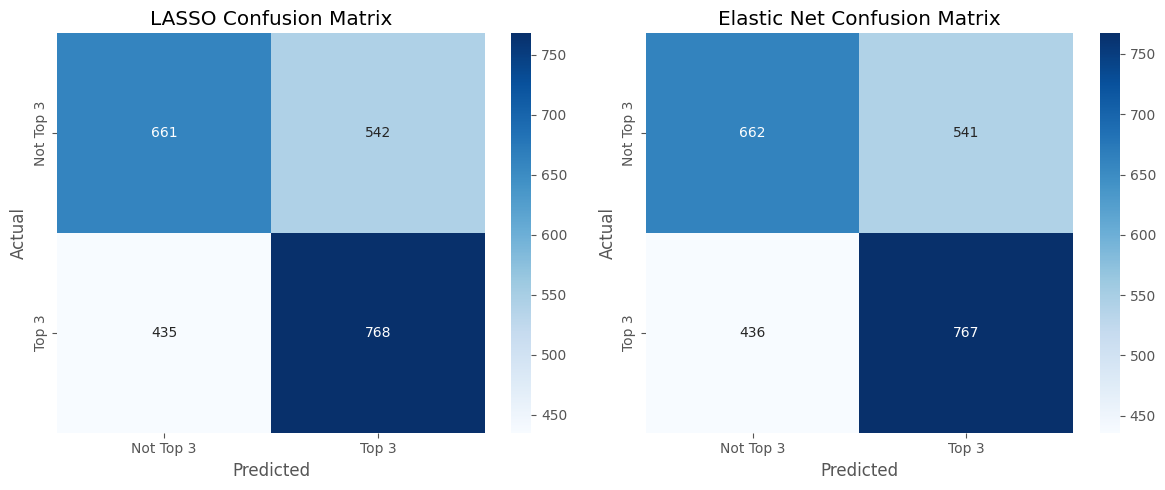

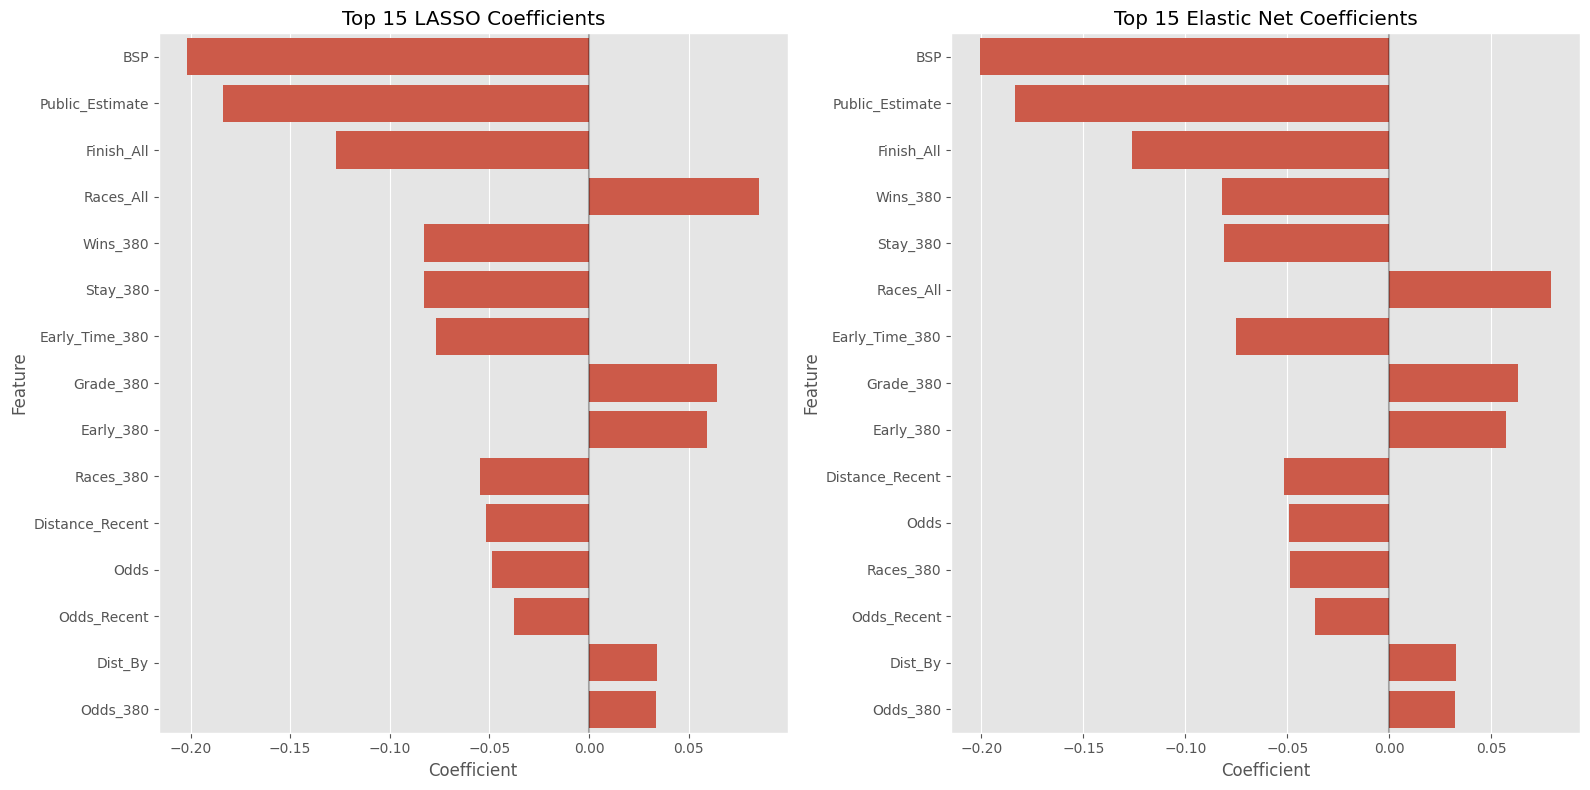


LASSO selected 24 features out of 25
Elastic Net selected 24 features out of 25

Top 10 most important features for LASSO:
            Feature  Coefficient
2               BSP    -0.201529
3   Public_Estimate    -0.183943
6        Finish_All    -0.126995
8         Races_All     0.085225
14         Wins_380    -0.082849
21         Stay_380    -0.082745
20   Early_Time_380    -0.076870
18        Grade_380     0.064298
17        Early_380     0.059363
13        Races_380    -0.054541

Top 10 most important features for Elastic Net:
            Feature  Coefficient
2               BSP    -0.200710
3   Public_Estimate    -0.183728
6        Finish_All    -0.126048
14         Wins_380    -0.082164
21         Stay_380    -0.081037
8         Races_All     0.079405
20   Early_Time_380    -0.075389
18        Grade_380     0.062971
17        Early_380     0.057358
9   Distance_Recent    -0.051510


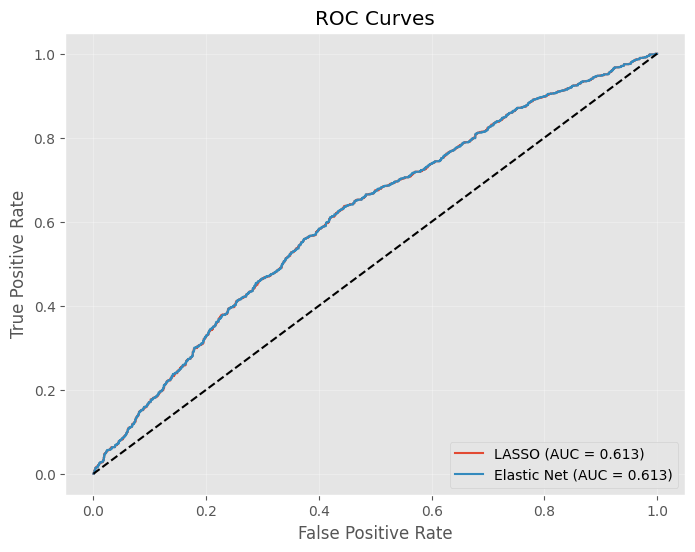

In [30]:
# LASSO and Elastic Net for Top 3 Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GroupKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Load and prepare data
print("Loading and preparing data...")
data = pd.read_csv('data/data_final.csv')

# Create binary target: Top 3 (1) vs Not Top 3 (0)
data['Top3'] = (data['Finished'] <= 3).astype(int)

# Group races together using Race_ID
group_ids = data['Race_ID'].values

# Prepare features and target
X = data.drop(['Finished', 'Winner', 'Race_ID', 'Top3'], axis=1)
X = X.select_dtypes(include=[np.number])  # Keep only numeric features
y_binary = data['Top3'].values

# Split data while preserving race grouping
gkf = GroupKFold(n_splits=5)
train_idx, test_idx = next(gkf.split(X, y_binary, groups=group_ids))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y_binary[train_idx], y_binary[test_idx]

# Check class distribution
print(f"Training set: {np.mean(y_train)*100:.1f}% Top 3")
print(f"Test set: {np.mean(y_test)*100:.1f}% Top 3")

# Create pipelines with scaling
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000))
])

elastic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic', LogisticRegression(penalty='elasticnet', solver='saga', random_state=42, max_iter=1000))
])

# Parameter grids for grid search
lasso_param_grid = {
    'lasso__C': np.logspace(-4, 1, 20)  # Regularization strength
}

elastic_param_grid = {
    'elastic__C': np.logspace(-4, 1, 10),  # Regularization strength
    'elastic__l1_ratio': np.linspace(0.1, 0.9, 9)  # Mixing parameter
}

# Set up cross-validation that preserves race groupings
cv = list(GroupKFold(n_splits=5).split(X_train, y_train, groups=group_ids[train_idx]))

# Grid search for LASSO
print("Performing grid search for LASSO...")
lasso_grid = GridSearchCV(
    lasso_pipeline, 
    lasso_param_grid, 
    cv=cv, 
    scoring='accuracy', 
    n_jobs=-1
)
lasso_grid.fit(X_train, y_train)

print(f"Best LASSO parameter (C): {lasso_grid.best_params_['lasso__C']}")
print(f"Best LASSO cross-validation accuracy: {lasso_grid.best_score_:.4f}")

# Grid search for Elastic Net
print("\nPerforming grid search for Elastic Net...")
elastic_grid = GridSearchCV(
    elastic_pipeline, 
    elastic_param_grid, 
    cv=cv, 
    scoring='accuracy', 
    n_jobs=-1
)
elastic_grid.fit(X_train, y_train)

print(f"Best Elastic Net parameters: C={elastic_grid.best_params_['elastic__C']}, L1 ratio={elastic_grid.best_params_['elastic__l1_ratio']}")
print(f"Best Elastic Net cross-validation accuracy: {elastic_grid.best_score_:.4f}")

# Evaluate LASSO on test set
lasso_predictions = lasso_grid.predict(X_test)
lasso_accuracy = accuracy_score(y_test, lasso_predictions)
print(f"\nLASSO accuracy on test set: {lasso_accuracy:.4f}")
print("\nLASSO Classification Report:")
print(classification_report(y_test, lasso_predictions))

# Evaluate Elastic Net on test set
elastic_predictions = elastic_grid.predict(X_test)
elastic_accuracy = accuracy_score(y_test, elastic_predictions)
print(f"\nElastic Net accuracy on test set: {elastic_accuracy:.4f}")
print("\nElastic Net Classification Report:")
print(classification_report(y_test, elastic_predictions))

# Compare with baseline (majority class classifier)
baseline_accuracy = max(np.mean(y_test), 1-np.mean(y_test))
print(f"\nBaseline accuracy (majority class): {baseline_accuracy:.4f}")
print(f"LASSO improvement over baseline: {lasso_accuracy - baseline_accuracy:.4f}")
print(f"Elastic Net improvement over baseline: {elastic_accuracy - baseline_accuracy:.4f}")
print(f"Previous LambdaMART accuracy: 0.5752")

# Confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# LASSO confusion matrix
cm_lasso = confusion_matrix(y_test, lasso_predictions)
sns.heatmap(cm_lasso, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Top 3', 'Top 3'], 
            yticklabels=['Not Top 3', 'Top 3'], ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('LASSO Confusion Matrix')

# Elastic Net confusion matrix
cm_elastic = confusion_matrix(y_test, elastic_predictions)
sns.heatmap(cm_elastic, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Top 3', 'Top 3'], 
            yticklabels=['Not Top 3', 'Top 3'], ax=ax2)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title('Elastic Net Confusion Matrix')

plt.tight_layout()
plt.show()

# Extract feature coefficients from best LASSO model
lasso_model = lasso_grid.best_estimator_.named_steps['lasso']
lasso_coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_[0],
    'Abs_Coefficient': np.abs(lasso_model.coef_[0])
})
lasso_coef = lasso_coef.sort_values('Abs_Coefficient', ascending=False)

# Extract feature coefficients from best Elastic Net model
elastic_model = elastic_grid.best_estimator_.named_steps['elastic']
elastic_coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': elastic_model.coef_[0],
    'Abs_Coefficient': np.abs(elastic_model.coef_[0])
})
elastic_coef = elastic_coef.sort_values('Abs_Coefficient', ascending=False)

# Plot feature importance for both models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# LASSO coefficients
top_lasso_features = lasso_coef.head(15)
sns.barplot(x='Coefficient', y='Feature', data=top_lasso_features, ax=ax1)
ax1.set_title('Top 15 LASSO Coefficients')
ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Elastic Net coefficients
top_elastic_features = elastic_coef.head(15)
sns.barplot(x='Coefficient', y='Feature', data=top_elastic_features, ax=ax2)
ax2.set_title('Top 15 Elastic Net Coefficients')
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# Count number of non-zero coefficients (selected features)
lasso_selected = np.sum(lasso_model.coef_[0] != 0)
elastic_selected = np.sum(elastic_model.coef_[0] != 0)

print(f"\nLASSO selected {lasso_selected} features out of {X.shape[1]}")
print(f"Elastic Net selected {elastic_selected} features out of {X.shape[1]}")

# Print top 10 most important features for each model
print("\nTop 10 most important features for LASSO:")
print(lasso_coef[['Feature', 'Coefficient']].head(10))

print("\nTop 10 most important features for Elastic Net:")
print(elastic_coef[['Feature', 'Coefficient']].head(10))

# ROC curves
lasso_probs = lasso_grid.predict_proba(X_test)[:, 1]
elastic_probs = elastic_grid.predict_proba(X_test)[:, 1]

fpr_lasso, tpr_lasso, _ = roc_curve(y_test, lasso_probs)
fpr_elastic, tpr_elastic, _ = roc_curve(y_test, elastic_probs)

roc_auc_lasso = auc(fpr_lasso, tpr_lasso)
roc_auc_elastic = auc(fpr_elastic, tpr_elastic)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lasso, tpr_lasso, label=f'LASSO (AUC = {roc_auc_lasso:.3f})')
plt.plot(fpr_elastic, tpr_elastic, label=f'Elastic Net (AUC = {roc_auc_elastic:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

The results show the penalized regressions (LASSO and EN) actualyl outperform the more complex LambdaMART in predicting placing dogs with an accuracy of 59.4% versus 57.7%. While this is an improvement, it's still modest for a binary classification task, especially given the rich feature set. 

Loading and preparing data...
Applying feature engineering...
Selecting important features...
Selected 17 features
Top features: ['BSP', 'Distance_All', 'Finish_All', 'Races_All', 'Odds_Recent', 'Early_Recent', 'Races_380', 'Odds_380', 'Grade_380', 'Time_380']
Performing grid search for MLP...
Best parameters: {'alpha': 0.01, 'learning_rate_init': 0.01}
Best cross-validation accuracy: 0.5825

Neural Network accuracy: 0.5840

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.55      0.57      1203
           1       0.58      0.62      0.60      1203

    accuracy                           0.58      2406
   macro avg       0.58      0.58      0.58      2406
weighted avg       0.58      0.58      0.58      2406


Baseline accuracy: 0.5000
LASSO/Elastic Net accuracy: 0.5939
LambdaMART accuracy: 0.5752
Neural Network accuracy: 0.5840


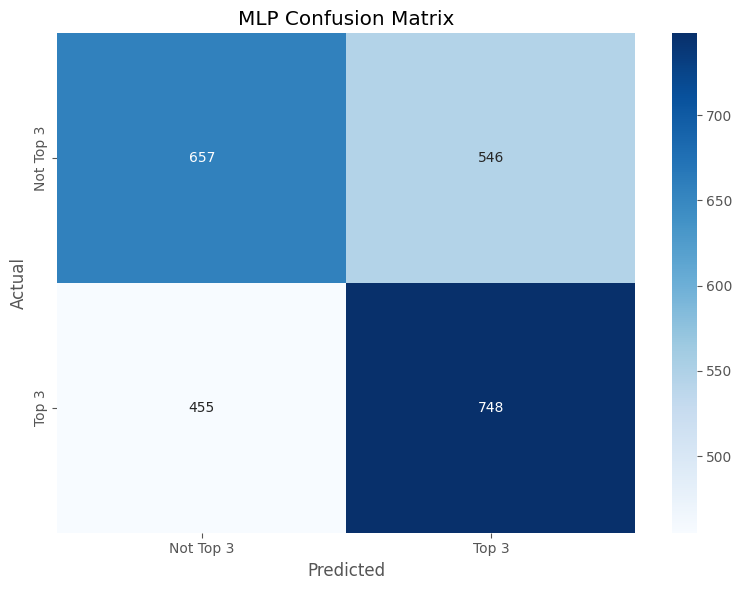

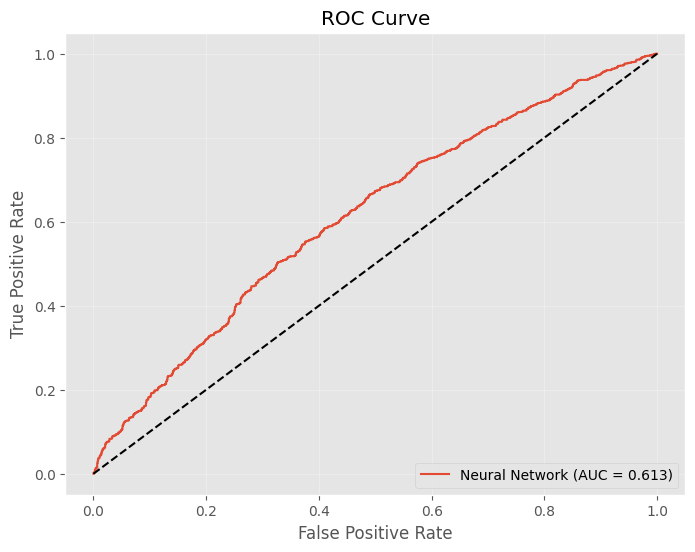

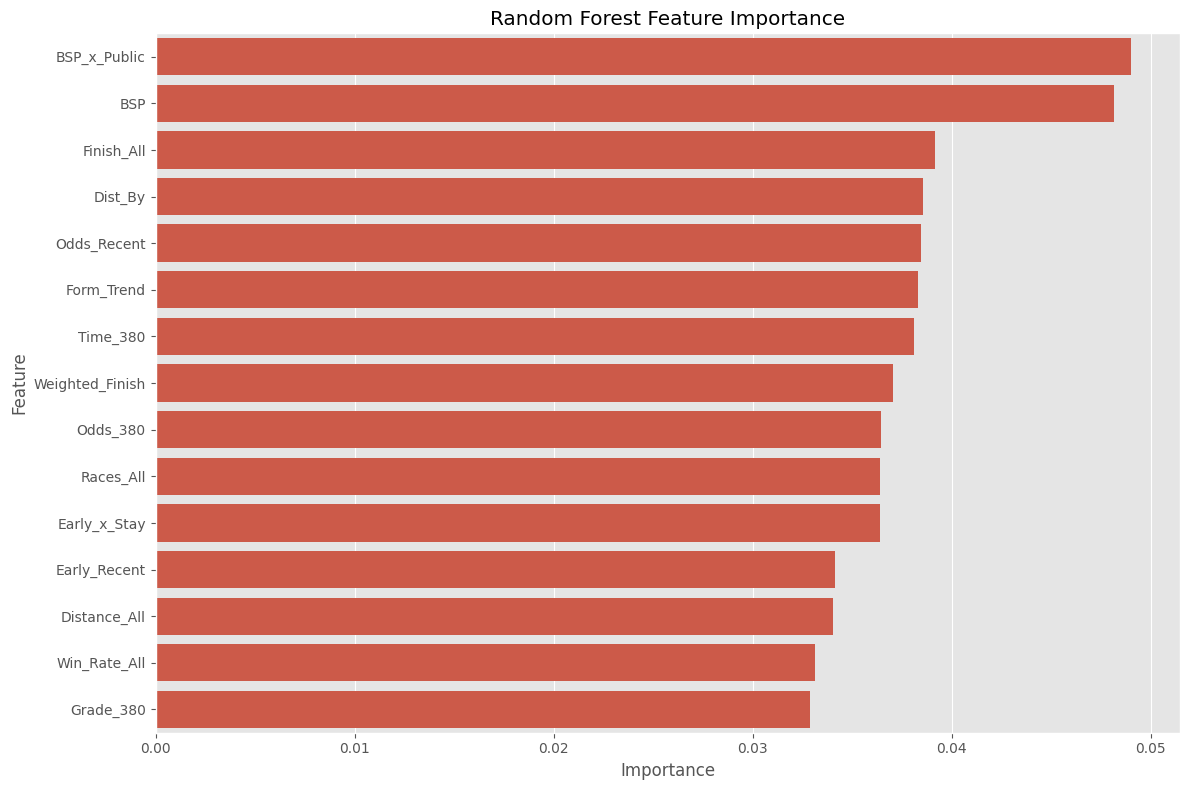

In [31]:
# Neural Network Approach Using Scikit-learn's MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GroupKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Load and prepare data
print("Loading and preparing data...")
data = pd.read_csv('data/data_final.csv')

# Create binary target: Top 3 (1) vs Not Top 3 (0)
data['Top3'] = (data['Finished'] <= 3).astype(int)

# Create enhanced features
def engineer_features(df):
    df_new = df.copy()
    
    # Win rates and consistency
    df_new['Win_Rate_All'] = df['Wins_380'] / np.maximum(df['Races_380'], 1)
    
    # Relative position within race
    race_groups = df.groupby('Race_ID')
    
    # BSP rank within race (normalized) - lower is better
    df_new['BSP_Rank'] = race_groups['BSP'].rank(pct=True)
    
    # Odds rank within race (normalized) - lower is better
    df_new['Odds_Rank'] = race_groups['Odds'].rank(pct=True)
    
    # Form indicators
    df_new['Form_Trend'] = df['Finish_Recent'] - df['Finish_All']
    
    # Recent performance weighted more heavily
    df_new['Weighted_Finish'] = 0.7 * df['Finish_Recent'] + 0.3 * df['Finish_All']
    
    # Feature interactions
    df_new['BSP_x_Public'] = df['BSP'] * df['Public_Estimate']
    df_new['Early_x_Stay'] = df['Early_380'] * df['Stay_380']
    
    # Days since last race impact
    df_new['Last_Run_Factor'] = np.log1p(df['Last_Run'])
    
    # Distance suitability
    df_new['Distance_Match'] = abs(380 - df['Distance_Places_All'])
    
    # Trap advantage indicators
    if 'Trap' in df.columns:
        # One-hot encode traps
        trap_dummies = pd.get_dummies(df['Trap'], prefix='Trap')
        df_new = pd.concat([df_new, trap_dummies], axis=1)
    
    return df_new

# Apply feature engineering
print("Applying feature engineering...")
data_enhanced = engineer_features(data)

# Prepare features and target
X = data_enhanced.drop(['Finished', 'Winner', 'Race_ID', 'Top3'], axis=1)
X = X.select_dtypes(include=[np.number])  # Keep only numeric features
y_binary = data_enhanced['Top3'].values

# Group races together using Race_ID
group_ids = data['Race_ID'].values

# Split data while preserving race grouping
gkf = GroupKFold(n_splits=5)
train_idx, test_idx = next(gkf.split(X, y_binary, groups=group_ids))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y_binary[train_idx], y_binary[test_idx]

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection using Random Forest
print("Selecting important features...")
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_train_scaled, y_train)

# Select top features
selector = SelectFromModel(rf_selector, threshold='median')
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = [X.columns[i] for i in selected_indices]
print(f"Selected {len(selected_features)} features")
print("Top features:", selected_features[:10])

# Define the neural network model
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=32,
    learning_rate='adaptive',
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=20,
    random_state=42
)

# Define parameter grid for optimization
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Grid search
print("Performing grid search for MLP...")
grid_search = GridSearchCV(
    mlp, 
    param_grid, 
    cv=3, 
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_selected, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate on test set
y_pred = grid_search.predict(X_test_selected)
y_pred_proba = grid_search.predict_proba(X_test_selected)[:, 1]

# Calculate accuracy and metrics
nn_accuracy = accuracy_score(y_test, y_pred)
print(f"\nNeural Network accuracy: {nn_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compare with previous models
print(f"\nBaseline accuracy: 0.5000")
print(f"LASSO/Elastic Net accuracy: 0.5939")
print(f"LambdaMART accuracy: 0.5752")
print(f"Neural Network accuracy: {nn_accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Top 3', 'Top 3'], 
            yticklabels=['Not Top 3', 'Top 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Confusion Matrix')
plt.tight_layout()
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
nn_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {nn_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Feature importance for Random Forest (used for feature selection)
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_selector.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=rf_importance.head(15), x='Importance', y='Feature')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()